# Business Analytics - Lumina Technology

Members:
* Sakshi Dilip Channawar, responseible for finding insights and performing t-test
* Darin Engkawong, responsible for finding insights and performing t-test
* Thi Hieu Ngan Tran (Rosa), responsible for finding insights, writing report, running predictive models, developing recommendations.
* Mai Trong Nghia Hoang (Edward), responsible for data exploration/preparation, finding insights, writing report, suggesting recommendations, building predictive models.

## **1. DATA EXPLORATION AND PREPARATION**

### **A. Data Overview**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Use 'ISO-8859-1' or 'latin1' encoding
data_2012 = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1')
data_2013 = pd.read_csv('2013_Data.csv', encoding='ISO-8859-1')

In [3]:
# Merge the data
data = pd.concat([data_2012, data_2013], ignore_index=True)

In [4]:
# Display a few rows of the dataset

data.head(2)

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20120509,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84.0,0,AUD,NaN,2217887,1,20120509,2865354,20120509,49:58.7
1,20120216,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12.0,0,AUD,NaN,2185745,1,20120216,2833515,20120216,49:58.7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988382 entries, 0 to 1988381
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           int64  
 1   fiscal_year               int64  
 2   fiscal_month              int64  
 3   calendar_year             int64  
 4   calendar_month            int64  
 5   calendar_day              int64  
 6   company_code              int64  
 7   customer_code             object 
 8   customer_district_code    int64  
 9   item_code                 object 
 10  business_area_code        object 
 11  item_group_code           object 
 12  item_class_code           object 
 13  item_type                 int64  
 14  bonus_group_code          object 
 15  environment_group_code    object 
 16  technology_group_code     object 
 17  commission_group_code     object 
 18  reporting_classification  object 
 19  light_source              object 
 20  warehouse_code          

In [6]:
# Check unique values and their formats in each feature

for col in data.columns:
    uniques = data[col].unique()
    print(col)
    print(uniques)
    print("-" * 50)

accounting_date
[20120509 20120216 20120518 20120109 20120504 20120626 20120605 20120622
 20120403 20120418 20120118 20120117 20120420 20120404 20120423 20120125
 20120427 20120217 20120209 20120319 20120606 20120119 20120210 20120227
 20120521 20120604 20120123 20120220 20120111 20120508 20120522 20120130
 20120619 20120206 20120615 20120621 20120523 20120214 20120208 20120120
 20120202 20120503 20120221 20120302 20120306 20120228 20120301 20120320
 20120307 20120131 20120424 20120224 20120525 20120203 20120502 20120419
 20120124 20120510 20120608 20120326 20120313 20120328 20120305 20120312
 20120517 20120110 20120524 20120412 20120614 20120515 20120201 20120112
 20120207 20120222 20120405 20120501 20120416 20120402 20120213 20120308
 20120323 20120417 20120516 20120607 20120229 20120613 20120215 20120601
 20120330 20120620 20120223 20120507 20120627 20120321 20120315 20120528
 20120314 20120514 20120628 20120531 20120103 20120618 20120625 20120413
 20120411 20120113 20120322 2012032

In [7]:
print("Unique values in:")

for col in data.columns:
    uniques = data[col].value_counts()
    print(f"{col} is: {uniques}")

Unique values in:
accounting_date is: accounting_date
20130430    8132
20120202    5810
20120703    5740
20120403    5713
20130528    5674
            ... 
20130831       2
20130329       1
20130106       1
20120728       1
20120630       1
Name: count, Length: 543, dtype: int64
fiscal_year is: fiscal_year
2013    978202
2012    537030
2014    473150
Name: count, dtype: int64
fiscal_month is: fiscal_month
11    213313
1     194771
2     184176
12    176517
4     166941
9     163786
10    161719
3     160993
8     160699
5     153317
7     139023
6     113127
Name: count, dtype: int64
calendar_year is: calendar_year
2012    1037205
2013     951177
Name: count, dtype: int64
calendar_month is: calendar_month
5     213313
7     194771
8     184176
6     176517
10    166941
3     163786
4     161719
9     160993
2     160699
11    153317
1     139023
12    113127
Name: count, dtype: int64
calendar_day is: calendar_day
5     74578
19    73692
18    73065
13    71833
4     71395
17    70557
2

In [8]:
# Check Statstical Summary of the dataset

data.describe()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_district_code,item_type,value_sales,value_cost,value_quantity,value_price_adjustment,item_source_class,invoice_number,line_number,invoice_date,order_date
count,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06,0.0,1.988382e+06,1.988382e+06,1.988382e+06,1.988382e+06
mean,2.012544e+07,2.012968e+03,6.524841e+00,2.012478e+03,6.398914e+00,1.546221e+01,2.300125e+02,3.817729e+02,5.835392e+00,4.098476e+02,2.638138e+02,2.718023e+01,2.441734e-02,NaN,1.260426e+06,3.612757e-01,2.012544e+07,2.012535e+07
std,5.011222e+03,7.120459e-01,3.620881e+00,4.995319e-01,3.251493e+00,8.684856e+00,1.843121e+02,1.527461e+02,1.888795e+00,2.935179e+03,2.050514e+03,3.294667e+02,1.543410e-01,NaN,1.355150e+06,1.718996e+00,5.011222e+03,5.107654e+03
min,2.012010e+07,2.012000e+03,1.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+02,1.000000e+00,-7.935420e+05,-1.414695e+05,-4.500000e+04,0.000000e+00,NaN,0.000000e+00,-9.200000e+01,2.012010e+07,2.009033e+07
25%,2.012062e+07,2.012000e+03,3.000000e+00,2.012000e+03,4.000000e+00,8.000000e+00,2.050000e+02,3.000000e+02,5.000000e+00,2.300000e+01,9.381000e+00,2.000000e+00,0.000000e+00,NaN,6.564320e+05,0.000000e+00,2.012062e+07,2.012062e+07
50%,2.012121e+07,2.013000e+03,7.000000e+00,2.012000e+03,6.000000e+00,1.500000e+01,2.050000e+02,4.000000e+02,7.000000e+00,6.750000e+01,3.107000e+01,6.000000e+00,0.000000e+00,NaN,7.496270e+05,0.000000e+00,2.012121e+07,2.012120e+07
75%,2.013062e+07,2.013000e+03,1.000000e+01,2.013000e+03,9.000000e+00,2.300000e+01,2.050000e+02,5.000000e+02,7.000000e+00,1.977000e+02,1.019106e+02,2.000000e+01,0.000000e+00,NaN,2.214222e+06,1.000000e+00,2.013062e+07,2.013062e+07
max,2.013123e+07,2.014000e+03,1.200000e+01,2.013000e+03,1.200000e+01,3.100000e+01,9.500000e+02,7.200000e+02,9.000000e+00,7.935420e+05,7.776692e+05,1.050000e+05,1.000000e+00,NaN,7.003023e+06,4.900000e+01,2.013123e+07,2.013123e+07


In [9]:
data.shape

(1988382, 41)

### **B. Handling Duplicates**

The selected columns for identifying duplicates were chosen based on their role in uniquely defining each transaction:

* invoice_number and line_number: These ensure each invoice and its line items are treated as distinct entries, even within the same invoice.
* customer_code: Differentiates transactions by customer, preventing overlap between invoices associated with different clients.
* item_code: Distinguishes different products or services within the same invoice.
* invoice_date: Ensures that transactions occurring on different dates are treated separately.
* value_sales, value_cost, and value_quantity: Capture the financial details of each transaction, ensuring that differences in sales, costs, or quantities prevent incorrect duplicate identification.

These columns collectively capture the "who," "what," "when," and financial aspects of the transaction, allowing for accurate identification and removal of true duplicates.

In [10]:
# Check for duplicates based on specific columns
duplicate_rows = data.duplicated(subset=["invoice_number", "line_number", "customer_code", 
                                         "item_code", "value_sales", "value_cost", "value_quantity", "invoice_date"])

# Display the number of duplicate rows found & initial shape of  the dataset
print(f"Number of duplicate rows based on selected columns: {duplicate_rows.sum()}")
print(f"Data shape before removing duplicates: {data.shape}")

Number of duplicate rows based on selected columns: 8962
Data shape before removing duplicates: (1988382, 41)


In [11]:
# Remove duplicates based on these columns, keeping the first occurrence
data = data.drop_duplicates(subset=["invoice_number", "line_number", "customer_code", 
                                    "item_code", "value_sales", "value_cost", "value_quantity", "invoice_date"], keep="first")

# Verify the shape of the data after removing duplicates
print(f"Data shape after removing duplicates: {data.shape}")

Data shape after removing duplicates: (1979420, 41)


### **C. Handling Columns with Missing Values or Irrelevant Information**

#### I. Handle Missing Values

In [12]:
# Check for missing values in each feature
missing_values = data.isnull().sum()

print(missing_values)

accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                  0
order_type_code             

**Item_source_class** presents 100% values being missed within the column. This requires removing them (instead of imputing).

In [13]:
# Drop "item_source_class"

data = data.drop(columns = "item_source_class")

In [14]:
# Re-check datashape, the columns should have 40 now
data.shape

(1979420, 40)

#### II. Handle Irrelevant Information

Columns that might not add value to the analysis or are redundant can be dropped.
* dss_update_time: This is a timestamp for the system's internal update, which might not be relevant to our analysis.
* The calendar_day column: Since we already have complete date information in order_date and invoice_date, calendar_day is redundant and does not provide additional value on its own.

Potential Redundency:
* calendar_year, calendar_month, calendar_day: These are redundant since we already have a combined date field like invoice_date and order_date.
* fiscal_year, fiscal_month: These might also be redundant if we only need one time reference (like the calendar year).

**Retain both fiscal and calendar date fields to cover both operational (order and invoice dates) and financial (fiscal year/month) perspectives for comprehensive analysis.**

In [15]:
# Drop "dss_update_time", "calendar_day" columns

data = data.drop(columns = ["dss_update_time", "calendar_day"])

#### III. Handle Mis-spelling Data & Other Potential Inconsistencies

##### *A) Order Type Codes*

In [16]:
# Check number of unique values in this column

data["order_type_code"].value_counts()

order_type_code
NOR    1608933
EDI     126208
CRR      45732
CRD      43827
PRO      29019
PRD      20842
PUP      19751
NOH      16416
PPO      13213
PMO      12106
CDG      12070
AES       7190
EXP       5773
SPC       5162
NOS       2531
CSH       2044
ZCG       1929
ZCR       1410
COP       1271
MIN        732
5TN        617
CPR        606
PSA        566
EDS        442
CRP        298
PME        242
COA        215
SPL        147
PPD         53
OBS         39
PGS         13
WDC         10
ZOP          5
PM0          4
CSO          2
ZC2          1
ZD3          1
Name: count, dtype: int64

The frequency count shows that PME appears 242 times, while PMO appears 12,106 times. Given the similarity between PME and PMO, it is very likely that PME is a misspelling of PMO. The lower occurrence of PME compared to PMO strongly supports the idea that it is a data entry error.

* PMO appears 12,106 times, and it's listed as a valid order type in the README.
* PM0 (with a zero) appears 4 times, but this is marked as a "Do Not Use" code in the README.
* PME appears 242 times, and it does not exist in the README.

Given this, PME is more likely a typo for PMO (with the letter "O"), rather than PM0 (with a zero), since PMO has significantly higher frequency and is a valid code, while PM0 is marked as "Do Not Use".

In [17]:
# Check total unique values in this column

data["order_type_code"].nunique()

37

In [18]:
# Replace "PME" with "PMO"

data["order_type_code"].replace("PME", "PMO", inplace = True)

In [19]:
# Re-check total unique values in this column

data["order_type_code"].nunique()

36

##### *B) abc_class_volume & abc_class_code*

Labels of these columns in the Metadata (README) match those in the dataset.

In [20]:
data["abc_class_volume"].value_counts()

abc_class_volume
J    1553827
U     196758
E     192390
D      10365
B       8424
A       7022
I       5810
C       2624
H       2108
G         92
Name: count, dtype: int64

In [21]:
data["abc_class_code"].value_counts()

abc_class_code
J    658398
A    291966
D    214960
B    212825
U    196758
G    187964
C    139954
I     43033
E     26532
F      7030
Name: count, dtype: int64

##### *C) Warehouse Codes*

In [22]:
# Check number of unique values in this column

data["warehouse_code"].value_counts()

warehouse_code
5N2    546020
CN0    199251
Unk    196758
5V0    100253
5Q0     88177
5W0     82553
5S0     79843
FA1     68579
1N1     60405
5N1     47507
1N0     42849
V0      40925
FWE     34344
LN9     33304
N0      30565
1V0     30399
1Q0     27952
CS0     22986
Q0      22255
CW0     20941
LV0     20817
1W0     19904
KN0     19734
LQ0     16295
W0      15288
S0      13864
CQ0     11911
1S0      8989
CV0      8650
Q1       7832
5Q1      7740
LW0      7251
5S1      6463
FWA      5279
FW2      4133
FA2      3823
5T0      3736
1Q1      3717
T0       3478
S1       3451
GN0      3411
1S1      2315
LS0      1959
1T0       612
EN0       568
CS1       516
CN1       505
LS1       493
JT0       198
CZ0       108
CT0       105
GW0        98
1T1        96
BB1        95
AS0        65
GS0        30
1N2        14
1N3         9
GQ0         2
Name: count, dtype: int64

**Suggested Actions**
1. Handling Unk: If Unk represents "Unknown," consider either keeping it for cases where the warehouse is genuinely unknown or explore ways to fill this missing information if possible.
2. Inactive Codes (like CN0): Since codes like CN0 are marked as inactive ("NO LONGER ACTIVE"), it might be useful to investigate if they represent outdated data. You can mark them as historical or filter them out, depending on your business needs.

In [23]:
# Check total unique values in this column

data["warehouse_code"].nunique()

59

The following codes are present but were not initially listed in the README:
* 1N2 – 14 occurrences
* 1N3 – 9 occurrences
* BB1 – 95 occurrences

Given the very low frequency of these undocumented codes (1N2, 1N3, and BB1) in a dataset of nearly 2 million rows, it is a reasonable decision to drop them. Their impact on the overall dataset is minimal, and since they are not documented, it's safer to assume they could be erroneous.

In [24]:
# Remove rows with values in warehouse codes that are not in the README

data = data.drop(data[data["warehouse_code"].isin(["1N2", "1N3", "BB1"])].index)

##### *D) Environment Group Codes*

In [25]:
# Check number of unique values in this column

data["environment_group_code"].value_counts()

environment_group_code
C                                 761954
S                                 492555
P                                 446314
R                                 189885
Z                                  87437
D                                    468
I                                    382
NA                                   162
M                                    145
Name: count, dtype: int64

##### *E) Business Area Code*

In [26]:
# Check number of unique values in this column

data["business_area_code"].value_counts()

business_area_code
LMP                               807089
SUR                               402303
COM                               199412
OTH                               186764
DLT                               103225
FLD                                90633
TRO                                33594
TAL                                33033
SAE                                28869
URB                                26849
RWY                                19262
HLB                                18126
PEN                                 8830
LCP                                 6426
980                                 5494
EXL                                 2229
970                                 1451
999                                 1255
940                                 1177
920                                 1003
985                                  671
910                                  505
950                                  418
IAI                                  2

##### *F) Customer District Code*

In [27]:
# Check number of unique values in this column

data["customer_district_code"].value_counts()

customer_district_code
300    428956
200    424709
400    349078
500    178573
600    166870
720     88245
410     72665
210     70189
540     59475
310     34838
530     27665
710     24954
510     24610
535     23176
520      5245
545        48
100         6
Name: count, dtype: int64

In [28]:
# Remove rows with customer district code of 100

data = data.drop(data[data["customer_district_code"] == 100].index)

In [29]:
data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
accounting_date,20120509,20120216,20120509,20120518,20120109,20120504,20120626,20120605,20120622,20120403
fiscal_year,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
fiscal_month,11,8,11,11,7,11,12,12,12,10
calendar_year,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
calendar_month,5,2,5,5,1,5,6,6,6,4
company_code,101,101,101,101,101,101,101,101,101,101
customer_code,411800601,361000403,361000403,565540415,565540415,361000410,361000410,361010426,361010426,361001440
customer_district_code,410,300,300,500,500,300,300,300,300,300
item_code,GENIE8WWWBC,GENIE8WWWBC,GENIE8WWWBC,GENIE8WWWBC,GENIE8WWWBC,GENIE8WWWBC,GENIE8WWWBC,GENIE8WWWBC,GENIE8WWWBC,GENIE11WWWES
business_area_code,LMP,LMP,LMP,LMP,LMP,LMP,LMP,LMP,LMP,LMP


##### *G) Technology Group Codes*

In [30]:
# Display unique values in this column

print(data["technology_group_code"].unique())
print("--" * 30)

# Calculate total unique values in the feature

print(f"There are {data['technology_group_code'].nunique()} unique values in Technology Group Codes")

['SYLV                                    '
 'NA                                      '
 'PIER                                    ' '96' '219' '92' '214' '380'
 '102' '123' '110' '98' '213' '580' '108' '999' '198'
 'SCHR                                    ' '82' '140' '540'
 'AUST                                    ' '480' '760' '460' '600' '520'
 '998' '570' '280' '330' '220' '415' '340' '225'
 'CSE                                     ' '565' '410' '560' '800' '680'
 '320' '550' '400' '160' '440' '420' '500' '555' '360' '290' '780' '545'
 '181' '240' '640' '820' '595' '300' '830' '70' '850' '86' '720' '740'
 '310' 'FGDFT                                   ' '350' '206' '64'
 'PNZ                                     ' '63'
 'CROM                                    ' '100' '78' '207' '208' '76'
 '211' '205' '85' '90' '68' '130'
 'GLG                                     '
 'INLIT                                   ' '72' '61' '880' '217' '215'
 '80' '210' 'INZ                              

In [31]:
# Create a list containing unexpected Technology Group codes

undocumented_code = ["PHANT", "DIGIN", "114", "112", "128", "88"]

# Check total rows presented in each of the unexpected Technology Group codes in the dataset
for i in undocumented_code:
    print(i)
    print(f" There are {data[data['technology_group_code'] == i].shape[0]} values")
    print("-" * 20)

PHANT
 There are 0 values
--------------------
DIGIN
 There are 0 values
--------------------
114
 There are 1 values
--------------------
112
 There are 1 values
--------------------
128
 There are 185 values
--------------------
88
 There are 2 values
--------------------


In [32]:
# Drop the rows presented in each of the unexpected Technology Group codes in the dataset

data = data.drop(data[data["technology_group_code"].isin(undocumented_code)].index)

In [33]:
data.shape

(1979107, 38)

### **D. Handling Inconsistencies (Categorical and Date Value)**

#### I. Conversion of Data Types

In [34]:
# Convert integer dates to datetime format

data["accounting_date"] = pd.to_datetime(data["accounting_date"], format="%Y%m%d")
data["invoice_date"] = pd.to_datetime(data["invoice_date"], format="%Y%m%d")
data["order_date"] = pd.to_datetime(data["order_date"], format="%Y%m%d")

In [35]:
data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,company_code,customer_code,customer_district_code,item_code,business_area_code,...,value_sales,value_cost,value_quantity,value_price_adjustment,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date
0,2012-05-09,2012,11,2012,5,101,411800601,410,GENIE8WWWBC,LMP,...,218.40,178.1976,84.0,0,AUD,2217887,1,2012-05-09,2865354,2012-05-09
1,2012-02-16,2012,8,2012,2,101,361000403,300,GENIE8WWWBC,LMP,...,38.28,25.4568,12.0,0,AUD,2185745,1,2012-02-16,2833515,2012-02-16
2,2012-05-09,2012,11,2012,5,101,361000403,300,GENIE8WWWBC,LMP,...,40.20,25.4568,12.0,0,AUD,2217807,1,2012-05-09,2864857,2012-05-08
3,2012-05-18,2012,11,2012,5,101,565540415,500,GENIE8WWWBC,LMP,...,20.10,12.7284,6.0,0,AUD,2222758,1,2012-05-18,2869759,2012-05-18
4,2012-01-09,2012,7,2012,1,101,565540415,500,GENIE8WWWBC,LMP,...,19.14,12.7284,6.0,0,AUD,2170374,1,2012-01-09,2819189,2012-01-09


#### II. Conversions of data in "customer_code" to String & Removal of Leading/Trailing Spaces

Based on overview of unique values, entries in customer_code seem to contain 2 different types of data including String and Integer. Hence, converting the data to string is necessary to ensure consistency for subsequent reference in further analyses.

In [36]:
data["customer_code"] = data["customer_code"].astype(str).str.strip()

In [37]:
# Identify columns that are either objects (strings) or mixed types
string = data.select_dtypes(include=['object']).columns

# List of specific columns you know should be strings and may have leading/trailing spaces
columns = ["item_code", "business_area_code", "item_group_code", 
                    "item_class_code", "bonus_group_code", "environment_group_code", 
                    "technology_group_code", "commission_group_code", "business_chain_l1_code", 
                    "contact_method_code"]

# Apply stripping only to string columns that may have leading/trailing spaces
for col in columns:
    if col in string:
        data[col] = data[col].str.strip()

In [38]:
# Re-Check unique values and their formats in each feature

for col in data.columns:
    uniques = data[col].unique()
    print(col)
    print(uniques)
    print("-" * 50)

accounting_date
<DatetimeArray>
['2012-05-09 00:00:00', '2012-02-16 00:00:00', '2012-05-18 00:00:00',
 '2012-01-09 00:00:00', '2012-05-04 00:00:00', '2012-06-26 00:00:00',
 '2012-06-05 00:00:00', '2012-06-22 00:00:00', '2012-04-03 00:00:00',
 '2012-04-18 00:00:00',
 ...
 '2013-12-31 00:00:00', '2013-12-24 00:00:00', '2013-12-27 00:00:00',
 '2013-12-23 00:00:00', '2013-12-30 00:00:00', '2013-12-22 00:00:00',
 '2013-11-23 00:00:00', '2013-11-16 00:00:00', '2013-07-27 00:00:00',
 '2013-08-31 00:00:00']
Length: 543, dtype: datetime64[ns]
--------------------------------------------------
fiscal_year
[2012 2013 2014]
--------------------------------------------------
fiscal_month
[11  8  7 12 10  9  3  5  6  1  2  4]
--------------------------------------------------
calendar_year
[2012 2013]
--------------------------------------------------
calendar_month
[ 5  2  1  6  4  3  9 11 12  7  8 10]
--------------------------------------------------
company_code
[101 100 140 205 170 220 950 240 

#### III. Standardise Categorical Columns

Check categorical columns such as customer_code, item_code, market_segment, etc., are standardised (e.g., no extra spaces or inconsistent values)

In [39]:
# Replace incorrect values
data["currency"] = data["currency"].str.strip().replace({"AUS": "AUD"})

print(data["currency"].value_counts())

currency
AUD    1861774
NZD     116153
USD        675
EUR        503
             2
Name: count, dtype: int64


In [40]:
# Drop 2 rows with empty currency value

data = data.drop(data[data["currency"] == ""].index)

#### IV. Logical Inconsistencies

**Order date should be before the invoice date**

In [41]:
# Ensure invoice_date is after order_date
invalid_dates = data[data['invoice_date'] < data['order_date']]

print(invalid_dates.shape[0])

22


There are 22 rows where invoice dates are before their corresponding order dates. Practically, this is not the case in business and the resulting rows should be removed.

In [42]:
# Drop rows where invoice_date is less than order_date
data.drop(data[data['invoice_date'] < data['order_date']].index, inplace=True)

# Verify the result
print(f"Rows after dropping: {len(data)}")

Rows after dropping: 1979083


Note

**Insights for Strategic Focus on Order Types**
* These are operational codes that classify the type of order transaction, not specific products.
* The codes help identify normal orders, project orders, returns, price adjustments, and other operational types, helping the company track and manage different kinds of customer transactions.
* “Do Not Use” codes likely represent outdated or special cases, and should be excluded or flagged for review in data analysis, unless they are still contributing significantly to revenue.

**Suggested Actions**
* Focus on high-volume order types like NOR, EDI, PRO, and EXP to drive marketing and sales strategies.
* Review the impact of “Do Not Use” codes to ensure they aren't inadvertently affecting current business operations.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979083 entries, 0 to 1988381
Data columns (total 38 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   fiscal_year               int64         
 2   fiscal_month              int64         
 3   calendar_year             int64         
 4   calendar_month            int64         
 5   company_code              int64         
 6   customer_code             object        
 7   customer_district_code    int64         
 8   item_code                 object        
 9   business_area_code        object        
 10  item_group_code           object        
 11  item_class_code           object        
 12  item_type                 int64         
 13  bonus_group_code          object        
 14  environment_group_code    object        
 15  technology_group_code     object        
 16  commission_group_code     object        
 17  reporting_cla

In [44]:
# fix negative normal order type due to human error

data.loc[((data["order_type_code"] == "NOR") | (data["order_type_code"] == "NOH")) & (data["value_sales"] < 0), "order_type_code"] = "CRR"

# Print the updated DataFrame
print(data[data['value_sales'] < 0])


        accounting_date  fiscal_year  fiscal_month  calendar_year  \
61           2012-02-02         2012             8           2012   
115          2012-01-17         2012             7           2012   
176          2012-04-17         2012            10           2012   
182          2012-02-02         2012             8           2012   
220          2012-01-20         2012             7           2012   
...                 ...          ...           ...            ...   
1988192      2013-09-26         2014             3           2013   
1988205      2013-12-10         2014             6           2013   
1988217      2013-09-17         2014             3           2013   
1988221      2013-08-06         2014             2           2013   
1988291      2013-12-13         2014             6           2013   

         calendar_month  company_code customer_code  customer_district_code  \
61                    2           101     267401311                     200   
115          

In [45]:
# Convert FX

# The average FX rates obtained from S&P Capital IQ
fx_rates = {
    "EUR": 0.767654,  # Euro to AUD average rate
    "NZD": 1.229117,  # NZD to AUD average rate
    "USD": 1.001749   # USD to AUD average rate
}

# Apply the conversion for value_sales in place
data.loc[data["currency"] == "NZD", "value_sales"] *= fx_rates["NZD"]
data.loc[data["currency"] == "USD", "value_sales"] *= fx_rates["USD"]
data.loc[data["currency"] == "EUR", "value_sales"] *= fx_rates["EUR"]

# Apply the conversion for value_cost in place
data.loc[data["currency"] == "NZD", "value_cost"] *= fx_rates["NZD"]
data.loc[data["currency"] == "USD", "value_cost"] *= fx_rates["USD"]
data.loc[data["currency"] == "EUR", "value_cost"] *= fx_rates["EUR"]

# EXPLORATION

In [46]:
data.groupby('value_price_adjustment')['value_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
value_price_adjustment,,,,,,,,
0,1934436.0,428.257328,2899.687455,-765100.00,25.74,71.6,203.42,793541.98000
1,44647.0,-185.343810,4934.452200,-793541.98,-59.80,-20.7,-5.50,228554.38369


In [47]:
data.groupby('value_price_adjustment')['value_cost'].describe()

,count,mean,std,min,25%,50%,75%,max
value_price_adjustment,,,,,,,,
0,1934436.0,272.741836,2088.885359,-141469.52,10.58,33.67,106.64,777669.2
1,44647.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0


In [48]:
data.groupby('reporting_classification').describe() 

accounting_date                                 \
                                   count                           mean   
reporting_classification                                                  
Continuing                        563435  2012-12-24 12:36:42.572434944   
Discontinuing                    1415648  2012-12-17 10:50:10.266958848   

                                                                    \
                                          min                  25%   
reporting_classification                                             
Continuing                2012-01-02 00:00:00  2012-06-21 00:00:00   
Discontinuing             2012-01-02 00:00:00  2012-06-18 00:00:00   

                                                                    \
                                          50%                  75%   
reporting_classification                                             
Continuing                2012-12-17 00:00:00  2013-06-25 00:00:00   
Discontinuing             2012-12-04 00:00:00  2013-06-20 00:00:00   

                                                   fiscal_year               \
                                          max  std       count         mean   
reporting_classification                                                      
Continuing                2013-12-31 00:00:00  NaN    563435.0  2012.976915   
Discontinuing             2013-12-31 00:00:00  NaN   1415648.0  2012.964869   

                          ...         invoice_date      order_date  \
                          ...                  max  std      count   
reporting_classification  ...                                        
Continuing                ...  2013-12-31 00:00:00  NaN     563435   
Discontinuing             ...  2013-12-31 00:00:00  NaN    1415648   

                                                                              \
                                                   mean                  min   
reporting_classification                                                       
Continuing                2012-12-19 00:03:39.436847104  2010-03-09 00:00:00   
Discontinuing             2012-12-14 12:40:55.810483456  2009-03-26 00:00:00   

                                                                    \
                                          25%                  50%   
reporting_classification                                             
Continuing                2012-06-18 00:00:00  2012-12-12 00:00:00   
Discontinuing             2012-06-14 00:00:00  2012-12-03 00:00:00   

                                                                         
                                          75%                  max  std  
reporting_classification                                                 
Continuing                2013-06-18 00:00:00  2013-12-30 00:00:00  NaN  
Discontinuing             2013-06-18 00:00:00  2013-12-30 00:00:00  NaN  

[2 rows x 128 columns]

In [49]:
data.groupby(['reporting_classification','business_area_code']).describe() 

accounting_date  \
                                                      count   
reporting_classification business_area_code                   
Continuing               910                            310   
                         920                           1000   
                         930                             26   
                         940                           1172   
                         945                            176   
                         950                            417   
                         960                            152   
                         970                           1443   
                         980                           5494   
                         985                            671   
                         999                           1254   
                         COM                         129744   
                         DLT                          50332   
                         EXL                           1265   
                         FLD                          27520   
                         HLB                           2259   
                         IAE                             30   
                         IAI                             26   
                         LCP                           6425   
                         OTH                         113831   
                         PEN                           3164   
                         RWY                           3946   
                         SAE                          23232   
                         SUR                         148345   
                         TAL                          20443   
                         TRO                           3870   
                         URB                          16888   
Discontinuing            910                            195   
                         920                              3   
                         940                              5   
                         945                              5   
                         950                              1   
                         970                              8   
                         999                              1   
                         COM                          69661   
                         DLT                          52893   
                         EXL                            964   
                         FLD                          63113   
                         HLB                          15867   
                         IAE                             69   
                         IAI                            200   
                         LCP                              1   
                         LMP                         807088   
                         OTH                          72910   
                         PEN                           5666   
                         RWY                          15316   
                         SAE                           5637   
                         SUR                         253955   
                         TAL                          12405   
                         TRO                          29724   
                         URB                           9961   

                                                                            \
                                                                      mean   
reporting_classification business_area_code                                  
Continuing               910                 2013-01-12 21:17:25.161290240   
                         920                           2012-11-06 21:28:48   
                         930                 2012-11-17 22:09:13.846153728   
                         940                 2012-10-28 08:52:00.819112448   
                         945                 2012-12-31 02:51:49.090909184   
                 

# Create column and convet data types

In [50]:
df = data.copy()

In [51]:
columns_to_convert = ['item_type', 'item_code']
df[columns_to_convert] = df[columns_to_convert].astype(str)

In [52]:
# create unit price column
df['unit_price'] = df['value_sales'] / df['value_quantity']


In [53]:
# create profit margin column
df['profit_margin'] = (df['value_sales']-df['value_cost'])/df['value_cost']

# PART 2

## The time gap between 'order date' and 'invoice date'

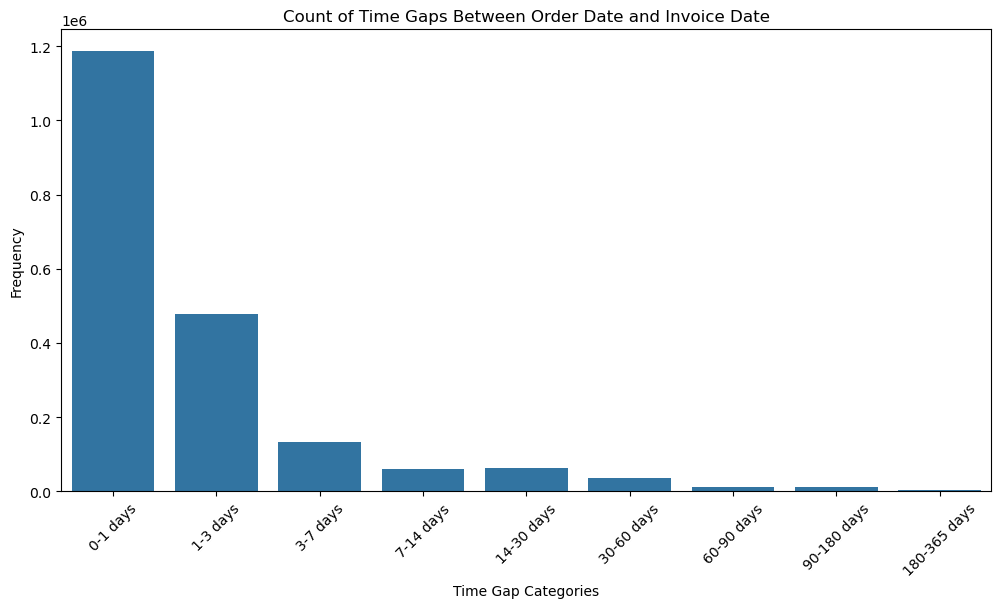

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This step ensures that date calculations (like finding the time gap) are accurate and compatible with datetime
data['order_date'] = pd.to_datetime(data['order_date'])
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

# This new column provides the foundation for grouping and analyzing the time taken between order and invoice dates
data['time_gap'] = (data['invoice_date'] - data['order_date']).dt.days

# Binning the data helps simplify the analysis and visualization by grouping the time gaps
bins = [0, 1, 3, 7, 14, 30, 60, 90, 180, 365]
labels = ['0-1 days', '1-3 days', '3-7 days', '7-14 days', '14-30 days', '30-60 days', '60-90 days', '90-180 days', '180-365 days']
data['time_gap_category'] = pd.cut(data['time_gap'], bins=bins, labels=labels, right=False)

# This aggregation provides the frequency distribution of time gaps, which is essential for plotting and understanding the most common intervals
time_gap_counts = data['time_gap_category'].value_counts().sort_index()

# This visualization helps identify which time gap categories are most frequent, providing insights into order processing efficiency
plt.figure(figsize=(12, 6))
sns.barplot(x=time_gap_counts.index, y=time_gap_counts.values)
plt.title('Count of Time Gaps Between Order Date and Invoice Date')
plt.xlabel('Time Gap Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The majority of orders have a 0–1 day lead time, which suggests effective invoicing. Very few orders take more than 30 days, and gaps longer than a day are less frequent. This points to a typically fast processing time, but looking at longer gaps could assist find sporadic bottlenecks or unique situations that could want better.



## Customer Retention Rates

Overall Customer Retention Rate: 78.04%

Retention Rate by Customer District Area:
customer_district_code
200    79.595960
210    93.975904
300    78.305520
310    90.000000
400    81.803797
410    91.000000
500    76.638177
510    86.111111
520    49.565217
530    82.658960
535    81.366460
540    70.949721
545    33.333333
600    77.777778
710    68.493151
720    62.666667
Name: retained, dtype: float64


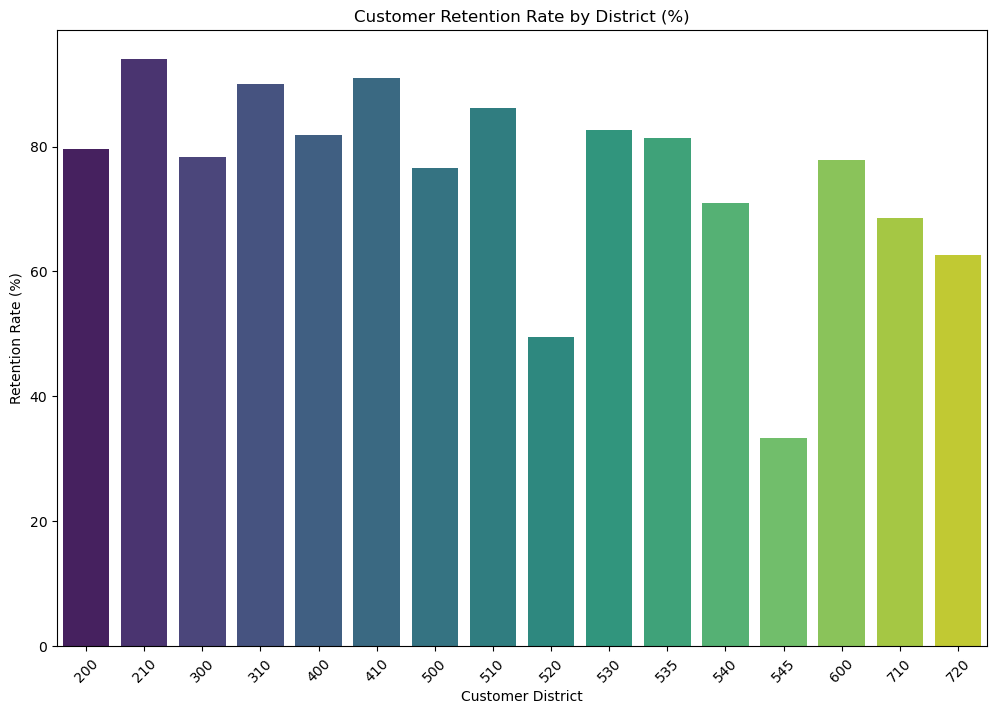

In [55]:
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'order_date' is in datetime format
data['order_date'] = pd.to_datetime(data['order_date'])

# Aggregating this information helps understand each customer’s purchase history, which is useful for assessing customer activity and retention
# Assuming 'customer_district_code' is a column in the dataset
customer_activity = data.groupby(['customer_code', 'customer_district_code']).agg(
    first_purchase=('order_date', 'min'),
    last_purchase=('order_date', 'max'),
    total_purchases=('order_date', 'count')
).reset_index()

# This date acts as a benchmark; customers who made purchases after this date are considered retained, while others are classified as churned
churn_cutoff_date = pd.to_datetime('2013-06-30')

# This logical check helps classify customers into retained or churned categories, based on their activity after the cut-off date
customer_activity['retained'] = customer_activity['last_purchase'] >= churn_cutoff_date

# Provides a quick summary of the overall retention rate, which indicates the proportion of customers who made purchases after the cut-off date
overall_retention_rate = customer_activity['retained'].mean() * 100
print(f"Overall Customer Retention Rate: {overall_retention_rate:.2f}%")

# Helps analyze customer retention on a district level, identifying which areas have higher or lower retention rates, valuable for region-specific strategies
district_retention_rates = customer_activity.groupby('customer_district_code')['retained'].mean() * 100

# Allows the user to see the retention rate for each district, providing a breakdown of retention performance across different areas
print("\nRetention Rate by Customer District Area:")
print(district_retention_rates)

# Visualization of retention rate by customer district as a percentage bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=district_retention_rates.index, y=district_retention_rates.values, palette='viridis')
plt.title('Customer Retention Rate by District (%)')
plt.xlabel('Customer District')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)  # Rotate district labels for readability
plt.show()

Every stage of the code leads to a concise, district-by-district analysis of customer retention. This method makes it possible to rapidly comprehend the overall retention rate before taking a closer look at district-level performance. By offering actionable insights, the visualisation assists stakeholders in determining locations with high and low retention rates.



In [56]:
import seaborn as sns

# Create Flag Column for Analysis and Visualization Purpose

In [57]:
# Copy the original dataset to create a new dataset df_p2
df_p2 = df.copy()

# Define the list of order types to check
project_order_types = ["PRO", "PRD", "PMO", "CRP"]

# Add the "flag_project_order" column: set to 1 if "order_type_code" is in the list, otherwise 0
df_p2['flag_project_order'] = df_p2['order_type_code'].apply(lambda x: 1 if x in project_order_types else 0)


# Add the export_order_flag column based on the condition
df_p2['export_order_flag'] = df_p2['order_type_code'].apply(lambda x: 1 if x == "EXP" else 0)

# Add the export_order_flag column based on the condition
df_p2['fx_order_flag'] = df_p2['currency'].apply(lambda x: 1 if x != "AUD" else 0)

df_p2

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,company_code,customer_code,customer_district_code,item_code,business_area_code,...,invoice_number,line_number,invoice_date,customer_order_number,order_date,unit_price,profit_margin,flag_project_order,export_order_flag,fx_order_flag
0,2012-05-09,2012,11,2012,5,101,411800601,410,GENIE8WWWBC,LMP,...,2217887,1,2012-05-09,2865354,2012-05-09,2.60,0.225606,0,0,0
1,2012-02-16,2012,8,2012,2,101,361000403,300,GENIE8WWWBC,LMP,...,2185745,1,2012-02-16,2833515,2012-02-16,3.19,0.503724,0,0,0
2,2012-05-09,2012,11,2012,5,101,361000403,300,GENIE8WWWBC,LMP,...,2217807,1,2012-05-09,2864857,2012-05-08,3.35,0.579146,0,0,0
3,2012-05-18,2012,11,2012,5,101,565540415,500,GENIE8WWWBC,LMP,...,2222758,1,2012-05-18,2869759,2012-05-18,3.35,0.579146,0,0,0
4,2012-01-09,2012,7,2012,1,101,565540415,500,GENIE8WWWBC,LMP,...,2170374,1,2012-01-09,2819189,2012-01-09,3.19,0.503724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988377,2013-11-06,2014,5,2013,11,101,299480704,200,TWG114/2005,SUR,...,2423898,1,2013-11-06,3079784,2013-11-06,30.50,1.311482,0,0,0
1988378,2013-07-17,2014,1,2013,7,101,500900630,500,SCRN236E2F4,TRO,...,2383667,1,2013-07-17,3024473,2013-06-27,237.00,0.738939,0,0,0
1988379,2013-10-21,2014,4,2013,10,205,552800304,500,DOT92STW,OTH,...,2419020,1,2013-10-21,3070986,2013-10-21,7.49,2.949380,0,0,0
1988380,2013-11-01,2014,5,2013,11,101,565540407,500,TWG114/2005,SUR,...,2422799,1,2013-11-01,3073478,2013-10-28,31.00,1.349375,0,0,0


In [58]:
# Calculate unit_price when quantity is not zero, otherwise keep it blank
df_p2['unit_price'] = df_p2['value_sales'] / df_p2['value_quantity'] 

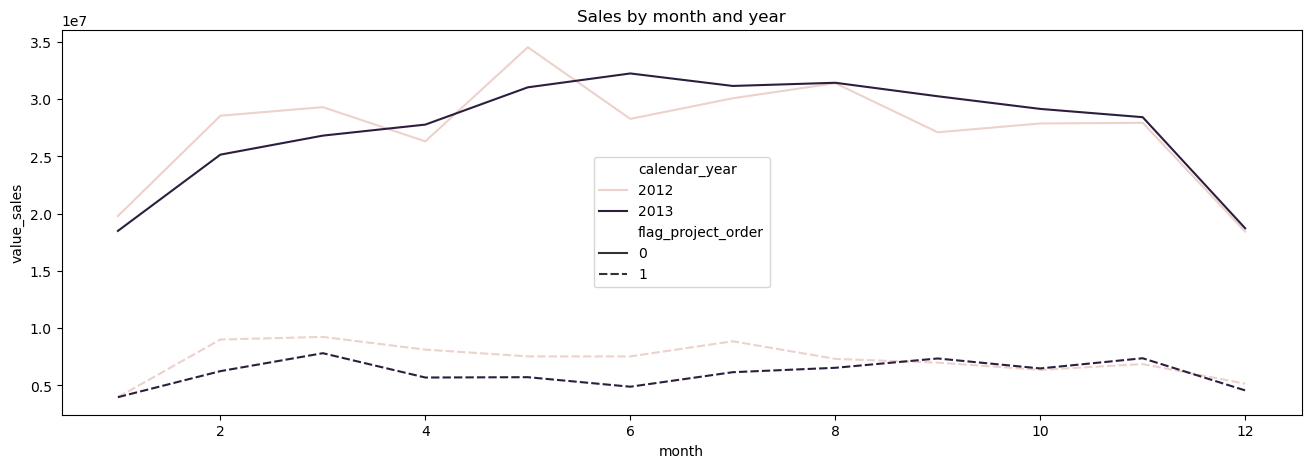

In [59]:
plt.figure(figsize=(16, 5) )
sns.lineplot(data=df_p2, x="calendar_month", y="value_sales", hue="calendar_year", estimator='sum',errorbar = None, style="flag_project_order")

plt.xlabel('month')

plt.title('Sales by month and year')
plt.xticks(rotation=0, fontsize=10)
#plt.savefig('C:/Users/Fon/OneDrive - Macquarie University/8000 TechniqueBA/Assignment2/pic/ear_box_bf.png', bbox_inches='tight')

plt.show()

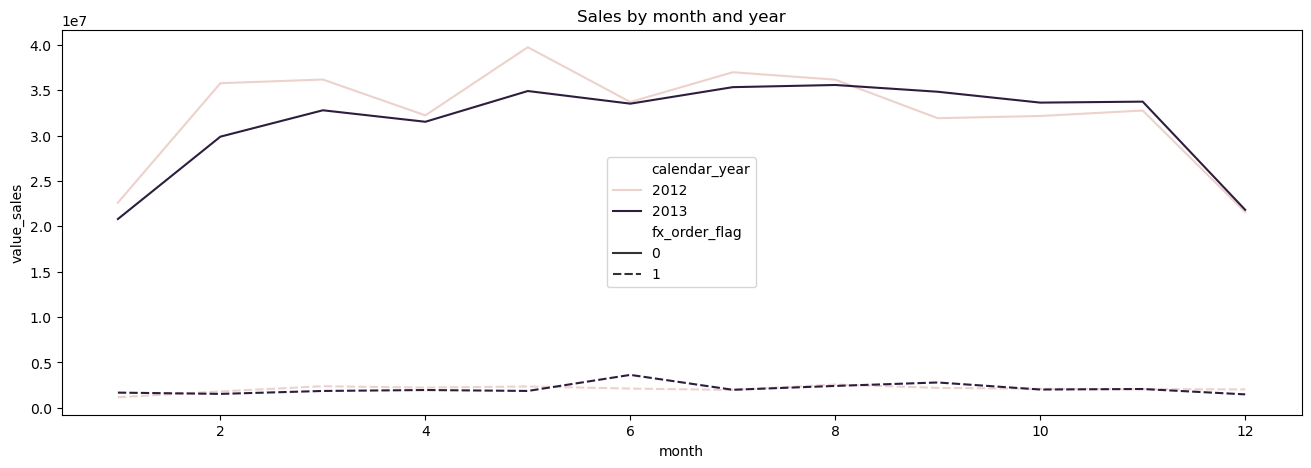

In [60]:
plt.figure(figsize=(16, 5) )
sns.lineplot(data=df_p2, x="calendar_month", y="value_sales", hue="calendar_year", estimator='sum',errorbar = None, style="fx_order_flag")

plt.xlabel('month')

plt.title('Sales by month and year')
plt.xticks(rotation=0, fontsize=10)
#plt.savefig('C:/Users/Fon/OneDrive - Macquarie University/8000 TechniqueBA/Assignment2/pic/ear_box_bf.png', bbox_inches='tight')

plt.show()

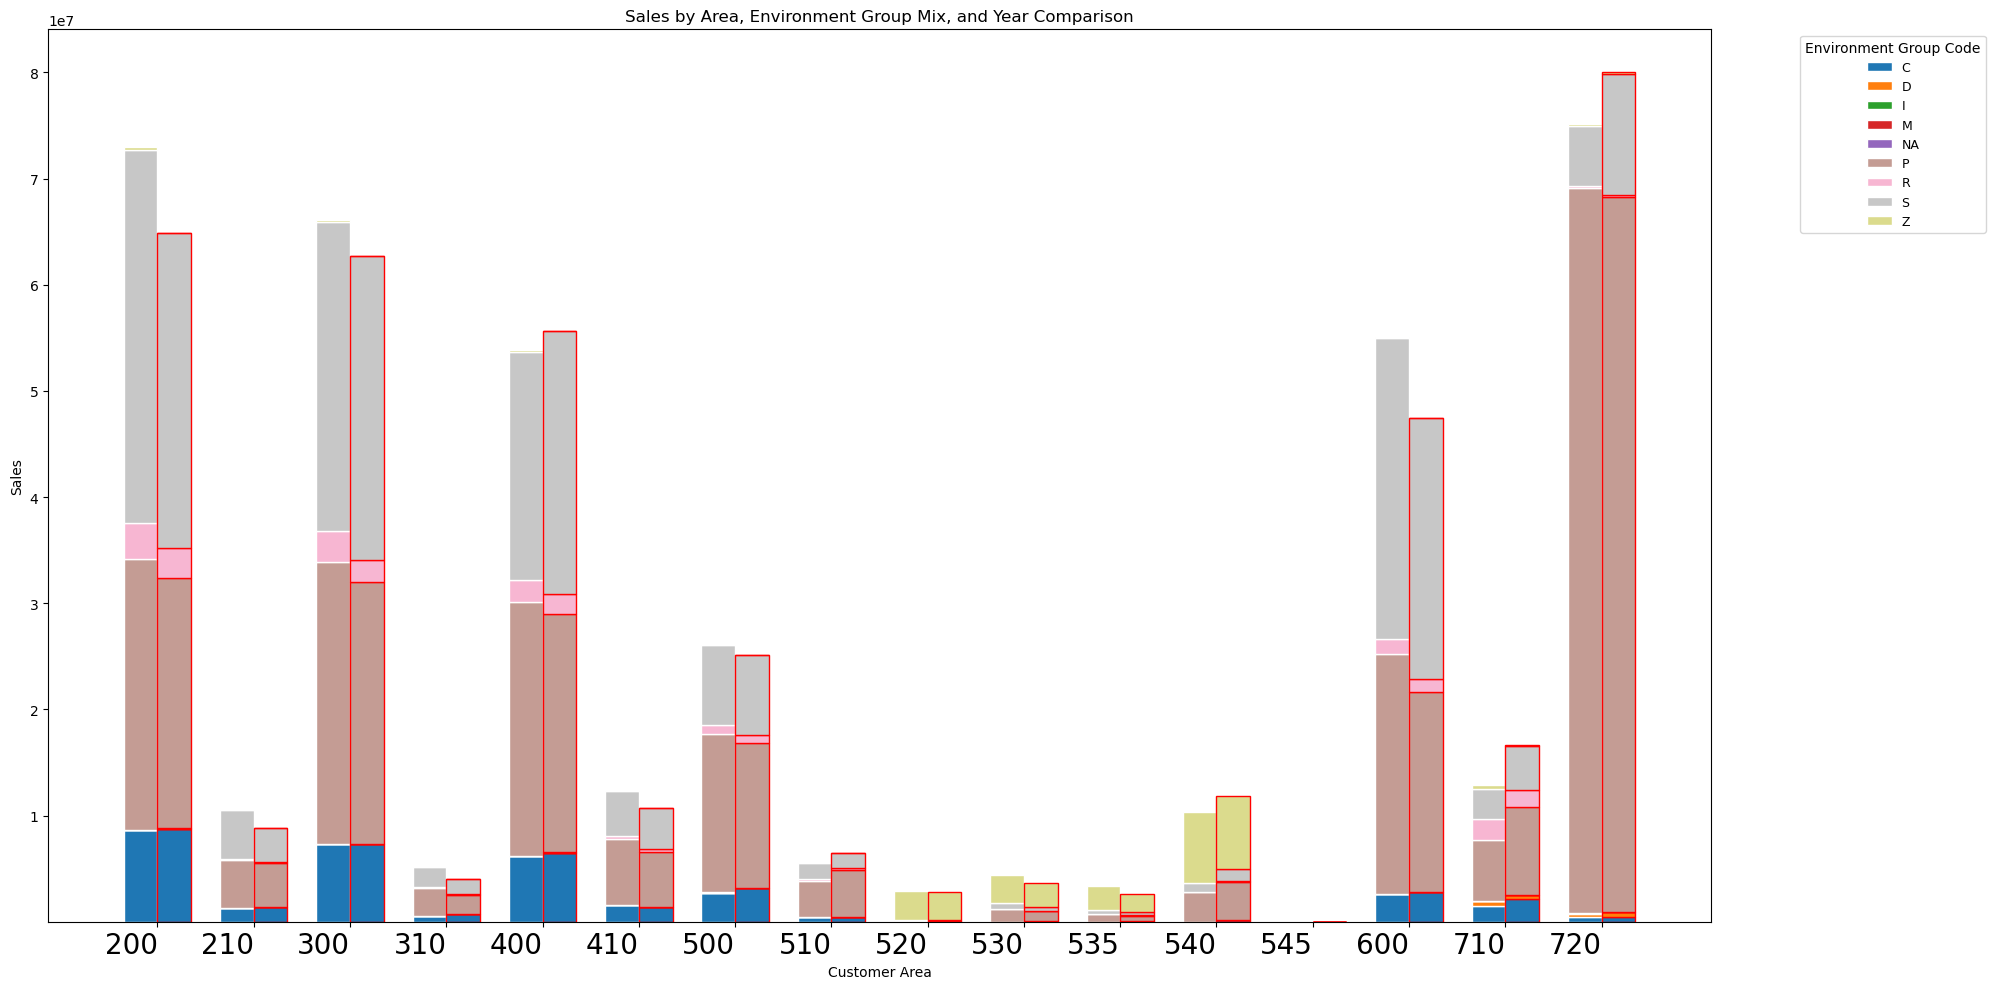

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure value_sales is numeric
df_p2['value_sales'] = pd.to_numeric(data['value_sales'], errors='coerce')

# Group data by year, area, and environment group, then calculate sales
stacked_data = df_p2.groupby(['calendar_year', 'customer_district_code', 'environment_group_code']).value_sales.sum().unstack().fillna(0).reset_index()

# Define colors for each unique environment group code
unique_env_groups = stacked_data.columns[2:]
color_map = {env: plt.cm.tab20(i / len(unique_env_groups)) for i, env in enumerate(unique_env_groups)}

# Set up the plot with a larger figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Define bar width for side-by-side bars per year
bar_width = 0.35
years = sorted(stacked_data['calendar_year'].unique())
edge_colors = {years[0]: 'white', years[1]: 'red'}  # Define edge colors for each year

# Loop through each year and plot stacked bars for each area
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = stacked_data[stacked_data['calendar_year'] == year]
    
    # Set x positions with offset for each year
    x_positions = np.arange(len(year_data['customer_district_code'])) + (i - 0.5) * bar_width

    # Initialize bottom positions for stacking
    bottom_values = [0] * len(x_positions)
    
    # Plot each environment group as a stack in the bars, with same color and different edge for each year
    for environment_group_code in unique_env_groups:
        ax.bar(
            x_positions, 
            year_data[environment_group_code], 
            width=bar_width, 
            bottom=bottom_values, 
            color=color_map[environment_group_code],    # Consistent color for each environment group
            edgecolor=edge_colors[year],                # Different edge color for each year
            label=f"{environment_group_code}" if i == 0 else "",  # Only label environment group once
        )
        # Update bottom position for the next stack
        bottom_values += year_data[environment_group_code].values

# Customizing plot aesthetics
plt.xlabel('Customer Area')
plt.ylabel('Sales')
plt.title('Sales by Area, Environment Group Mix, and Year Comparison')
plt.xticks(np.arange(len(year_data['customer_district_code'])), year_data['customer_district_code'], rotation=0, ha='right', fontsize=20)

# Place the legend in the top-right corner, outside the plot area
plt.legend(title="Environment Group Code", loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=9)

# Adjust layout to avoid cutting off the legend
plt.tight_layout()
plt.show()


In [62]:
print(years)

[2012, 2013]


In [63]:
df_p2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979083 entries, 0 to 1988381
Data columns (total 43 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   fiscal_year               int64         
 2   fiscal_month              int64         
 3   calendar_year             int64         
 4   calendar_month            int64         
 5   company_code              int64         
 6   customer_code             object        
 7   customer_district_code    int64         
 8   item_code                 object        
 9   business_area_code        object        
 10  item_group_code           object        
 11  item_class_code           object        
 12  item_type                 object        
 13  bonus_group_code          object        
 14  environment_group_code    object        
 15  technology_group_code     object        
 16  commission_group_code     object        
 17  reporting_cla

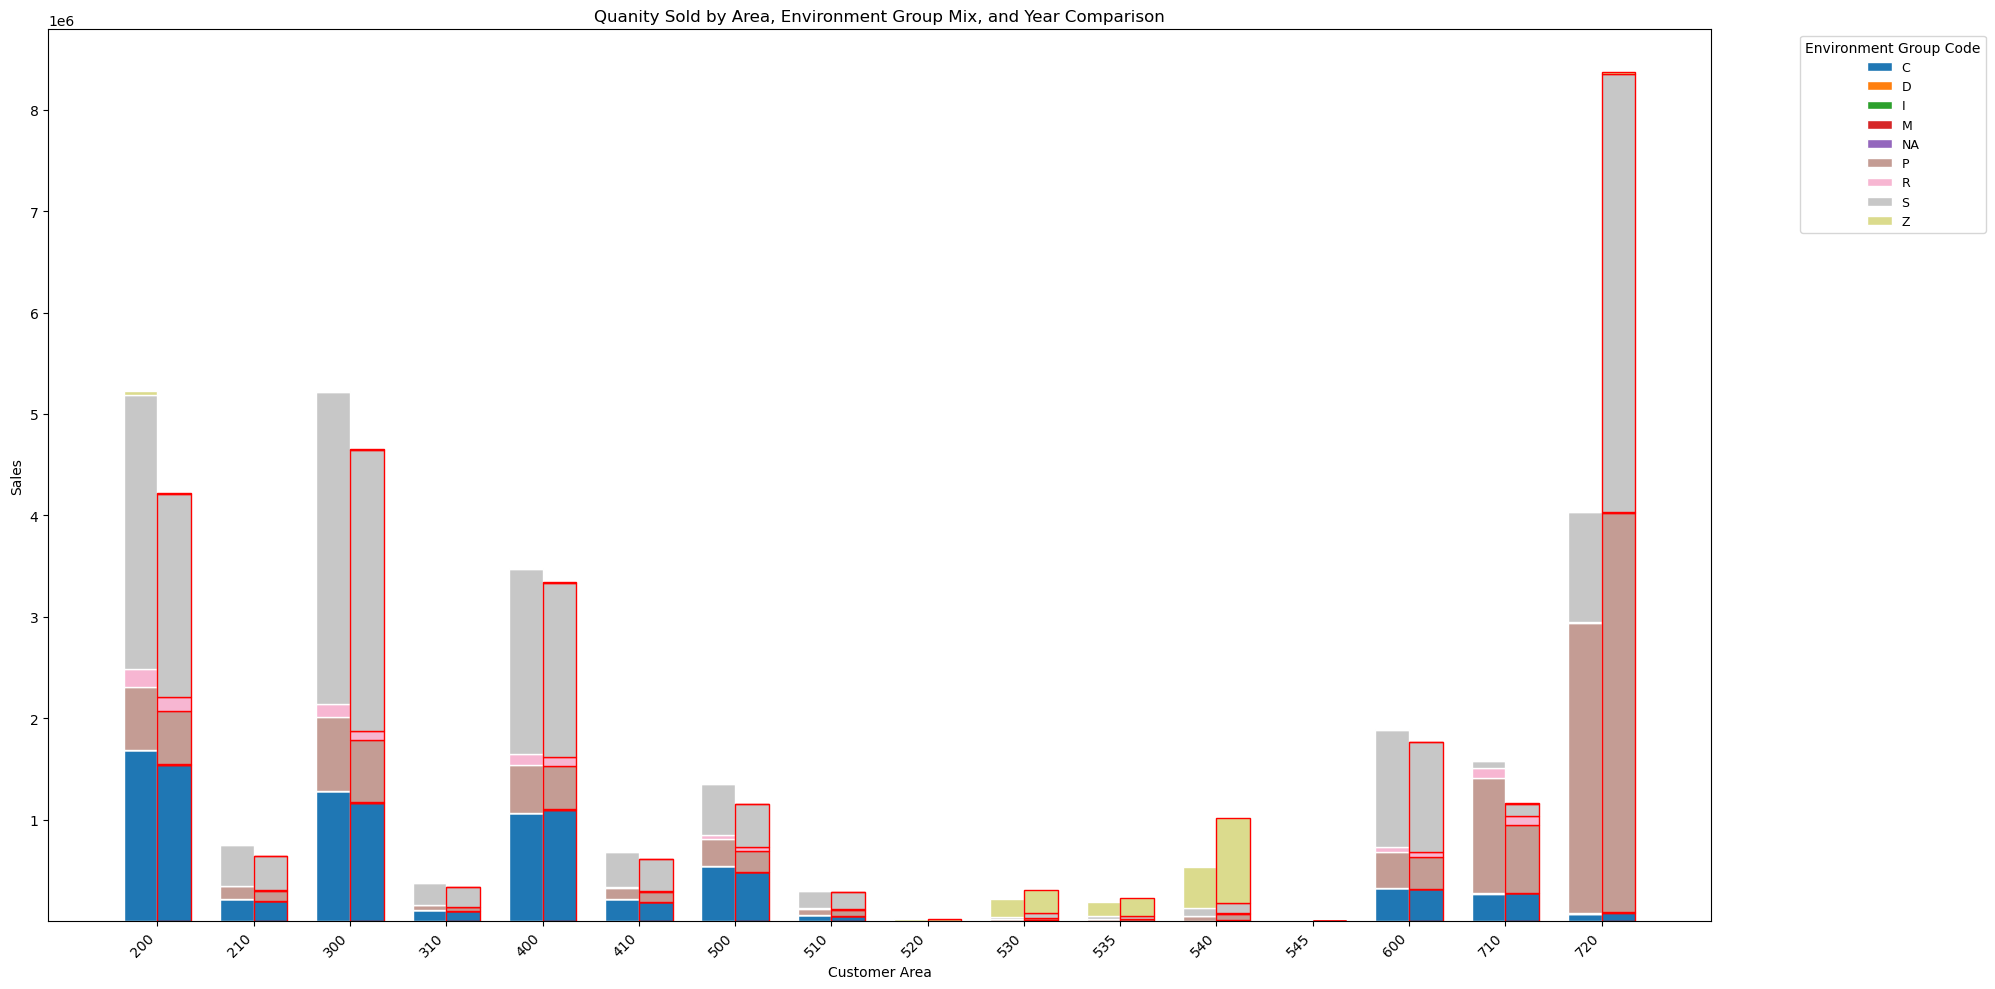

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure value_sales is numeric
data['value_sales'] = pd.to_numeric(data['value_sales'], errors='coerce')

# Group data by year, area, and environment group, then calculate sales
stacked_data = data.groupby(['calendar_year', 'customer_district_code', 'environment_group_code']).value_quantity.sum().unstack().fillna(0).reset_index()

# Define colors for each unique environment group code
unique_env_groups = stacked_data.columns[2:]
color_map = {env: plt.cm.tab20(i / len(unique_env_groups)) for i, env in enumerate(unique_env_groups)}

# Set up the plot with a larger figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Define bar width for side-by-side bars per year
bar_width = 0.35
years = sorted(stacked_data['calendar_year'].unique())
edge_colors = {years[0]: 'white', years[1]: 'red'}  # Define edge colors for each year

# Loop through each year and plot stacked bars for each area
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = stacked_data[stacked_data['calendar_year'] == year]
    
    # Set x positions with offset for each year
    x_positions = np.arange(len(year_data['customer_district_code'])) + (i - 0.5) * bar_width

    # Initialize bottom positions for stacking
    bottom_values = [0] * len(x_positions)
    
    # Plot each environment group as a stack in the bars, with same color and different edge for each year
    for environment_group_code in unique_env_groups:
        ax.bar(
            x_positions, 
            year_data[environment_group_code], 
            width=bar_width, 
            bottom=bottom_values, 
            color=color_map[environment_group_code],    # Consistent color for each environment group
            edgecolor=edge_colors[year],                # Different edge color for each year
            label=f"{environment_group_code}" if i == 0 else "",  # Only label environment group once
        )
        # Update bottom position for the next stack
        bottom_values += year_data[environment_group_code].values

# Customizing plot aesthetics
plt.xlabel('Customer Area')
plt.ylabel('Sales')
plt.title('Quanity Sold by Area, Environment Group Mix, and Year Comparison')
plt.xticks(np.arange(len(year_data['customer_district_code'])), year_data['customer_district_code'], rotation=45, ha='right', fontsize=10)

# Place the legend in the top-right corner, outside the plot area
plt.legend(title="Environment Group Code", loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=9)

# Adjust layout to avoid cutting off the legend
plt.tight_layout()
plt.show()


In [65]:
# Define list of codes to check against
bus_codes_grouping = ['SUR', 'LMP', 'COM', 'RWY', 'DLT', 'TRO', 'FLD', 'OTH', 'HLB', 'SAE']

# Create new column with conditional logic
df_p2['bus_area_group'] = df_p2['business_area_code'].apply(lambda x: x if x in bus_codes_grouping  else 'Others')

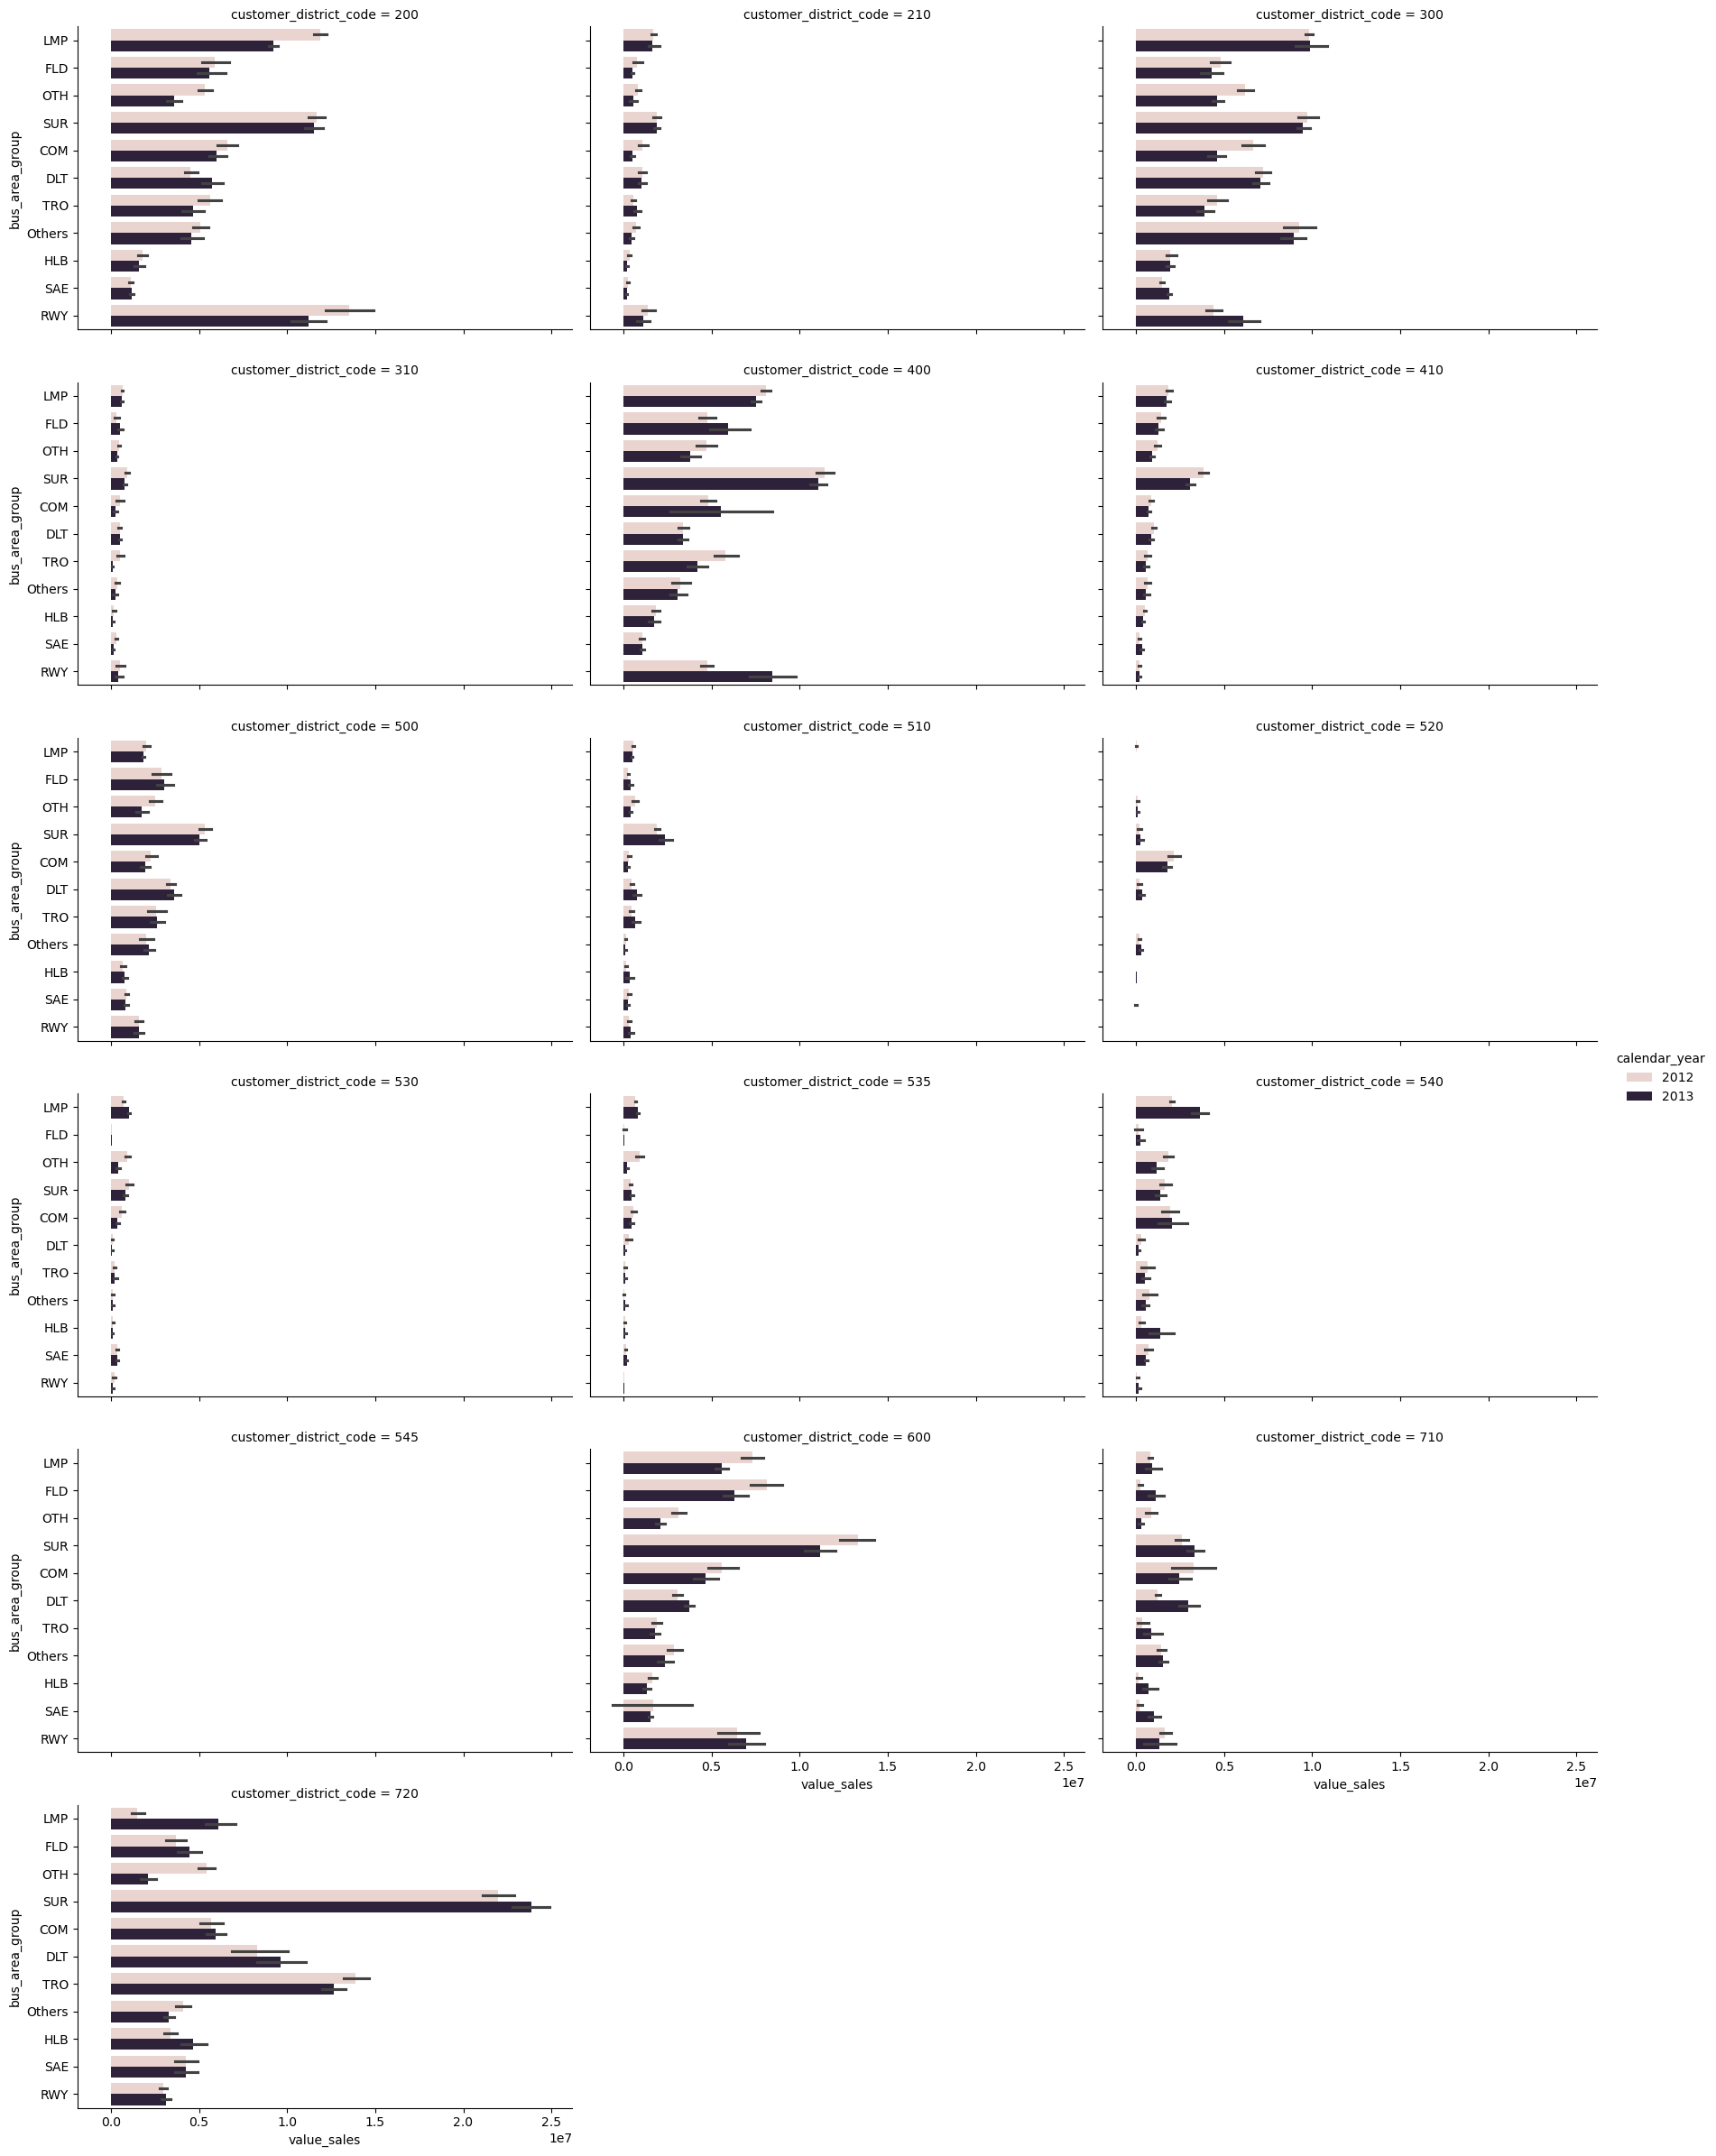

In [66]:


sns.catplot(data=df_p2, x="value_sales", y="bus_area_group", hue="calendar_year", kind="bar", estimator='sum',
  col="customer_district_code", col_wrap=3, height=4, aspect=1.5   )


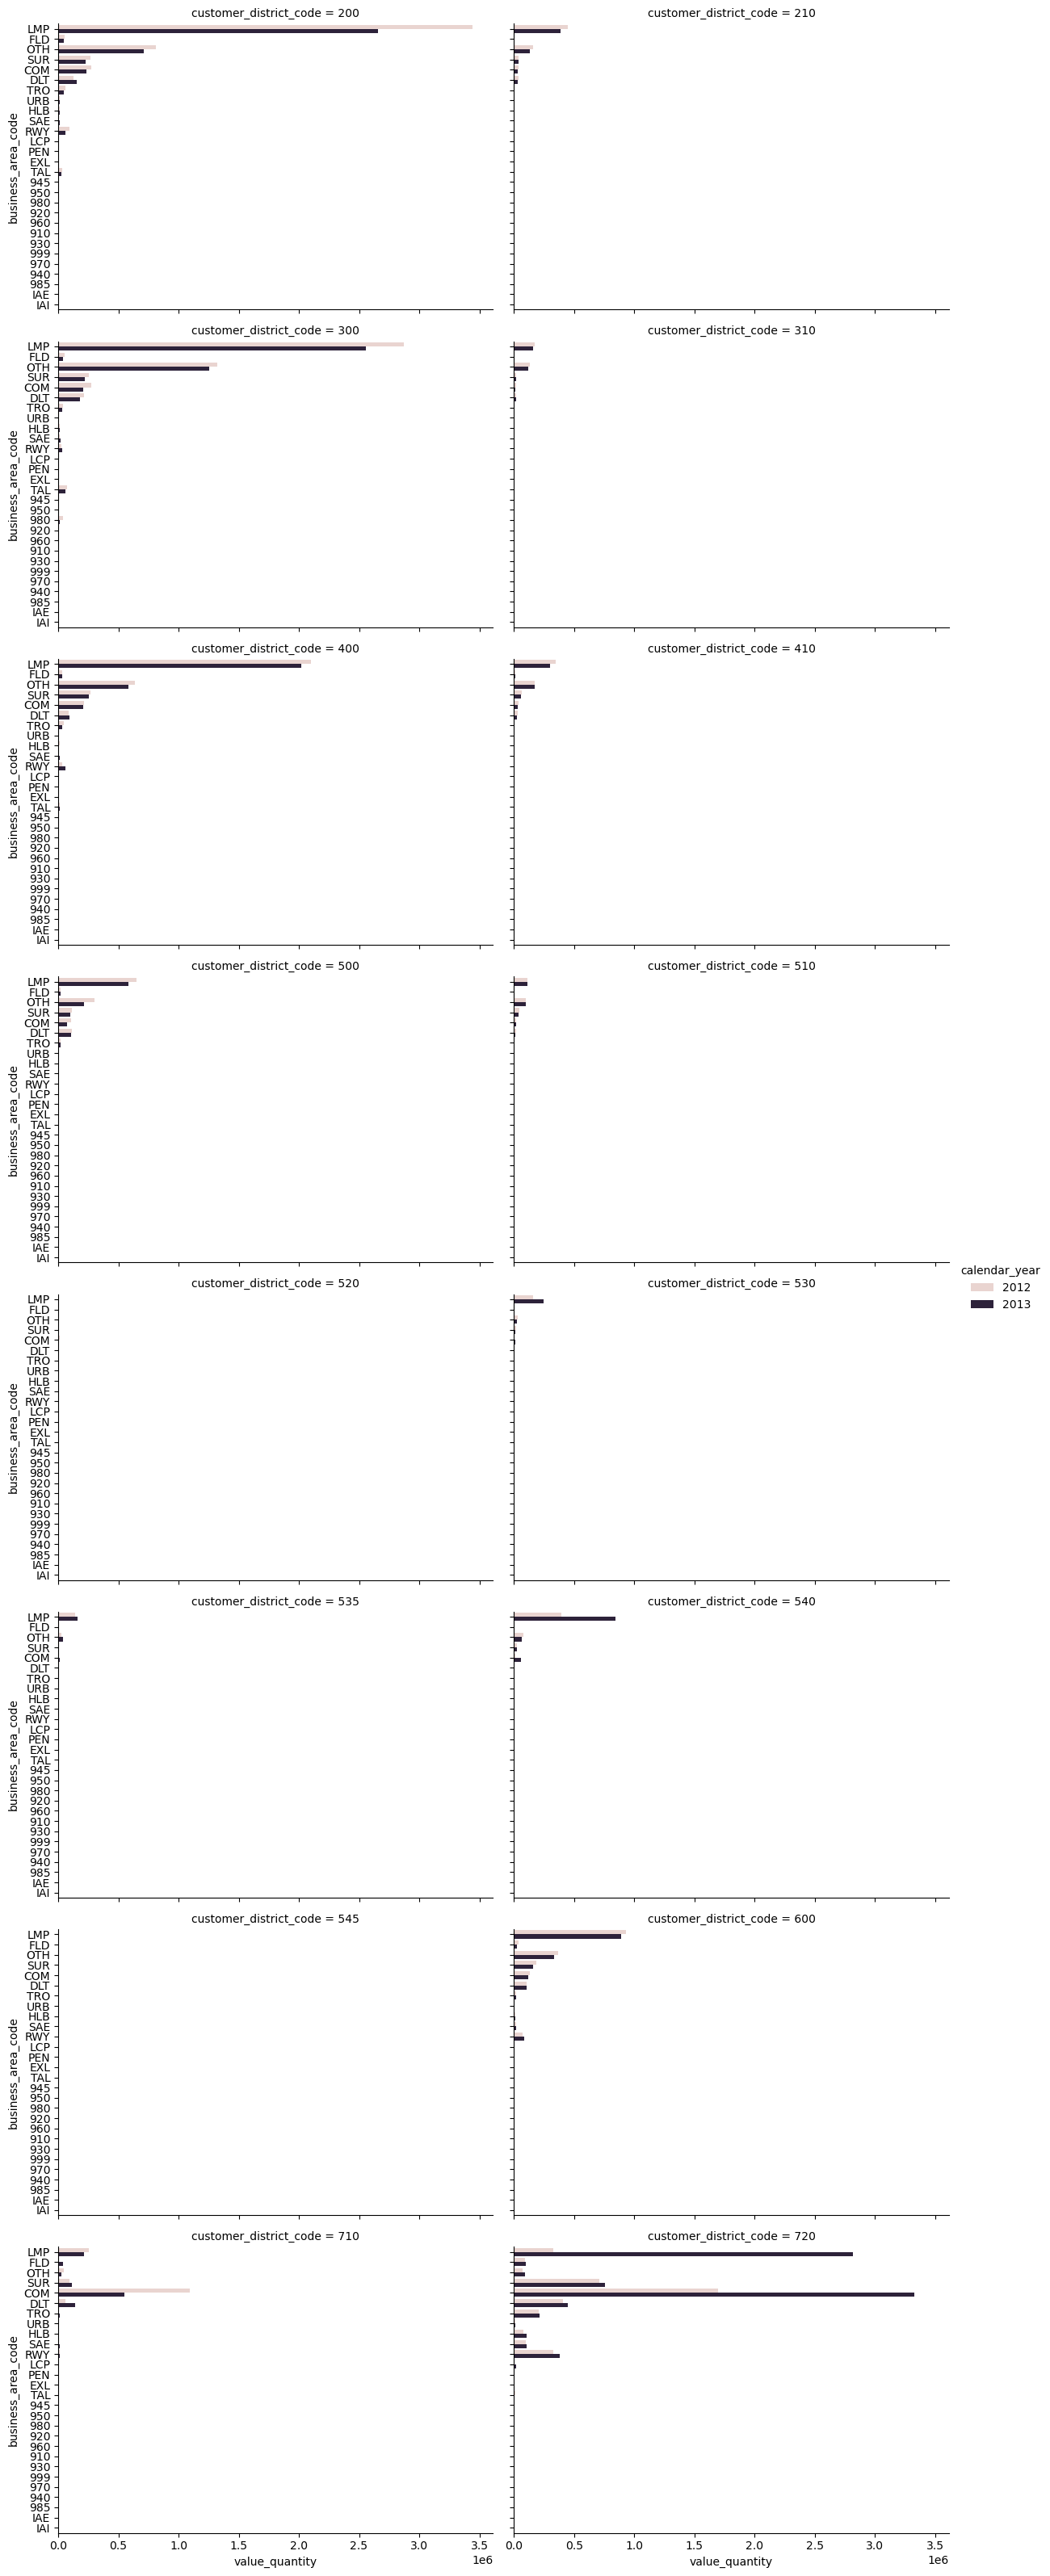

In [67]:
sns.catplot(data=data, x="value_quantity", y="business_area_code", hue="calendar_year", kind="bar", estimator='sum',col ='customer_district_code'
,col_wrap=2, height=4, aspect=1.5  , errorbar = None)

In [68]:
data.groupby('order_type_code')['value_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
order_type_code,,,,,,,,
5TN,595.0,2695.438084,23631.083674,-291344.000000,-520.000000,900.000000,4263.070000,299128.000000
AES,7190.0,1781.416628,7474.095182,0.000000,52.114561,199.116954,1041.510727,237465.404400
CDG,12070.0,-40.224170,89.094364,-7665.000000,-50.000000,-29.240000,-11.340000,6.660000
COA,213.0,2189.647439,13470.379775,3.900000,65.640000,195.000000,650.000000,187320.000000
COP,1271.0,1103.283408,7261.586097,0.000000,36.431028,99.128286,462.959438,228554.383690
CPR,606.0,-2199.915924,10904.803672,-237465.404400,-1167.894490,-243.117189,-60.000000,0.000000
CRD,43827.0,-236.853238,4932.685190,-793541.980000,-67.500000,-22.700000,-6.300000,480.000000
CRP,298.0,-1797.892129,4618.769471,-37139.220513,-1038.114570,-277.050000,-51.945000,0.000000
CRR,49651.0,-388.054906,3930.214888,-765100.000000,-236.000000,-84.250000,-30.590000,0.000000


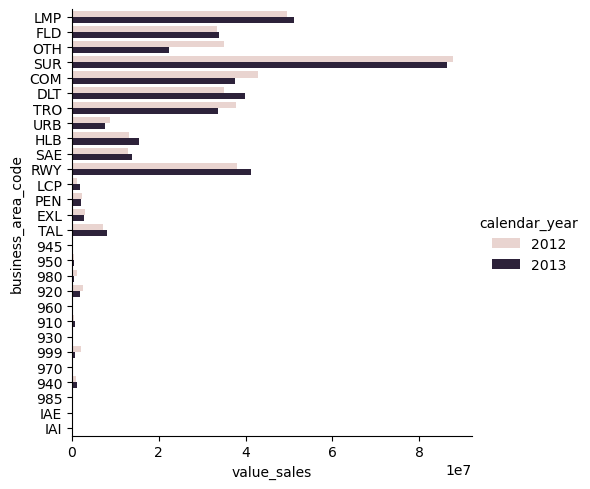

In [69]:
sns.catplot(data=data, x="value_sales", y="business_area_code", hue="calendar_year", kind="bar", estimator='sum',errorbar = None
)

In [70]:
top_bus_code = df_p2.groupby("business_area_code")['value_sales'].sum()
top_bus_code = top_bus_code.sort_values(ascending=False)
top_bus_code

business_area_code
SUR    1.742617e+08
LMP    1.007670e+08
COM    8.042733e+07
RWY    7.924635e+07
DLT    7.496518e+07
TRO    7.143937e+07
FLD    6.717938e+07
OTH    5.736310e+07
HLB    2.854144e+07
SAE    2.676963e+07
URB    1.635928e+07
TAL    1.522189e+07
EXL    5.767577e+06
920    4.497697e+06
PEN    4.320405e+06
LCP    2.866476e+06
999    2.583532e+06
940    2.192052e+06
980    1.576176e+06
910    1.229716e+06
950    9.150049e+05
945    5.806099e+05
970    4.388225e+05
960    2.973566e+05
IAE    1.190152e+05
IAI    9.250843e+04
930    7.411761e+04
985    6.861807e+04
Name: value_sales, dtype: float64

In [71]:
# create grouping column for visualization purpose

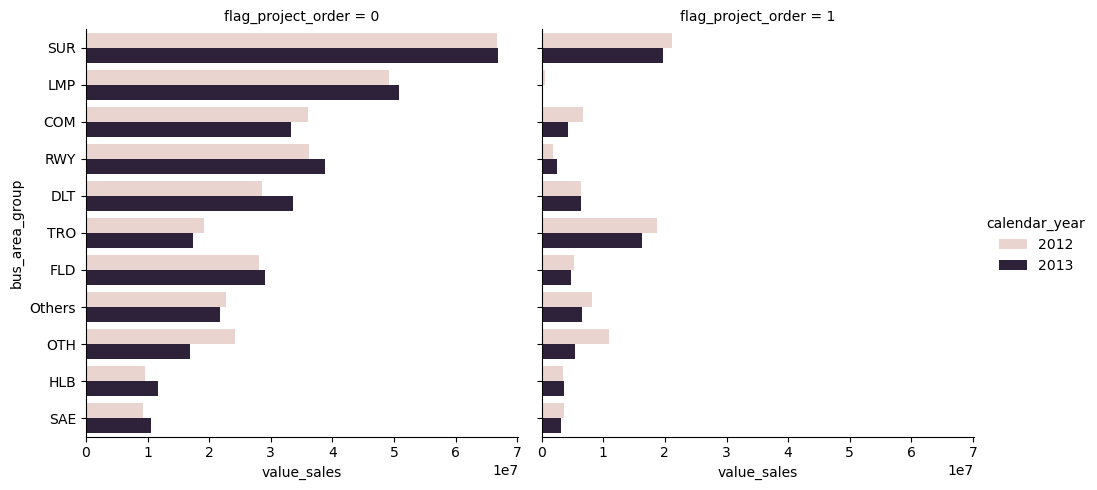

In [72]:
import seaborn as sns

# Calculate the order of `bus_area_group` based on the sum of `value_sales`
order = df_p2.groupby("bus_area_group")["value_sales"].sum().sort_values(ascending=False).index

# Create the catplot with bars sorted in descending order
sns.catplot(
    data=df_p2, 
    x="value_sales", 
    y="bus_area_group", 
    hue="calendar_year", 
    kind="bar", 
    estimator='sum', 
    errorbar=None, 
    col="flag_project_order",
    
    order=order  # Apply the sorted order here
)


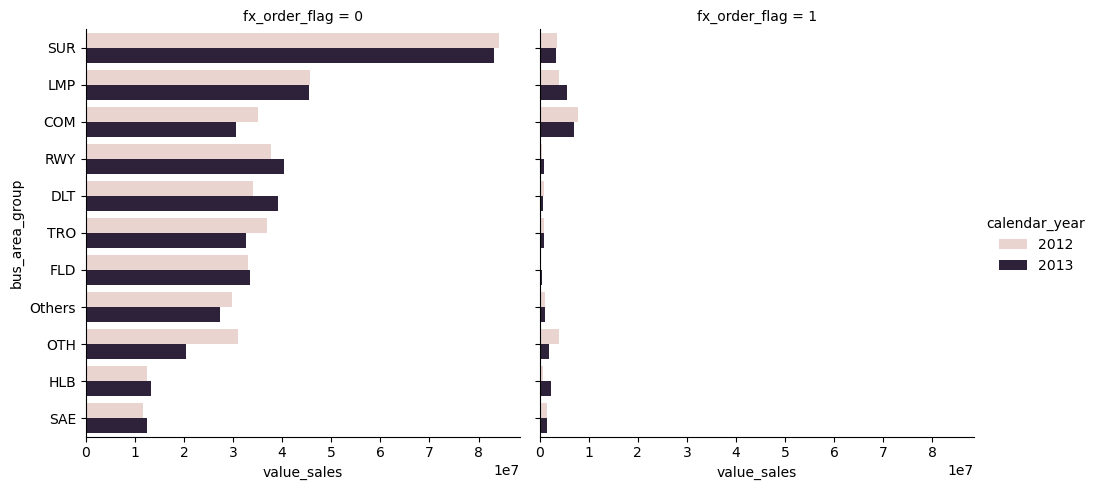

In [73]:
import seaborn as sns

# Calculate the order of `bus_area_group` based on the sum of `value_sales`
order = df_p2.groupby("bus_area_group")["value_sales"].sum().sort_values(ascending=False).index

# Create the catplot with bars sorted in descending order
sns.catplot(
    data=df_p2, 
    x="value_sales", 
    y="bus_area_group", 
    hue="calendar_year", 
    kind="bar", 
    estimator='sum', 
    errorbar=None, 
    col="fx_order_flag",
    
    order=order  # Apply the sorted order here
)

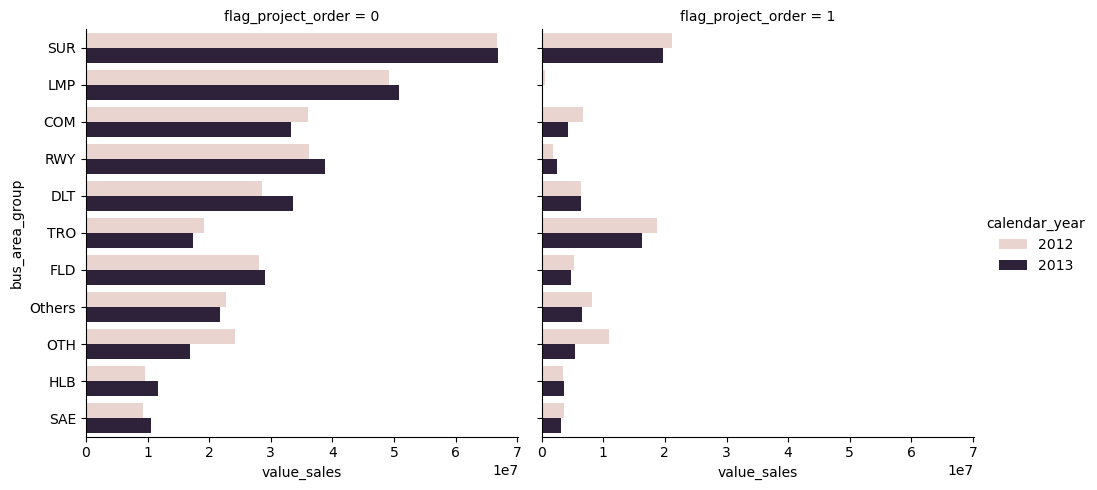

In [74]:
import seaborn as sns

# Calculate the order of `bus_area_group` based on the sum of `value_sales`
order = df_p2.groupby("bus_area_group")["value_sales"].sum().sort_values(ascending=False).index

# Create the catplot with bars sorted in descending order
sns.catplot(
    data=df_p2, 
    x="value_sales", 
    y="bus_area_group", 
    hue="calendar_year", 
    kind="bar", 
    estimator='sum', 
    errorbar=None, 
    col="flag_project_order",
    
    order=order  # Apply the sorted order here
)


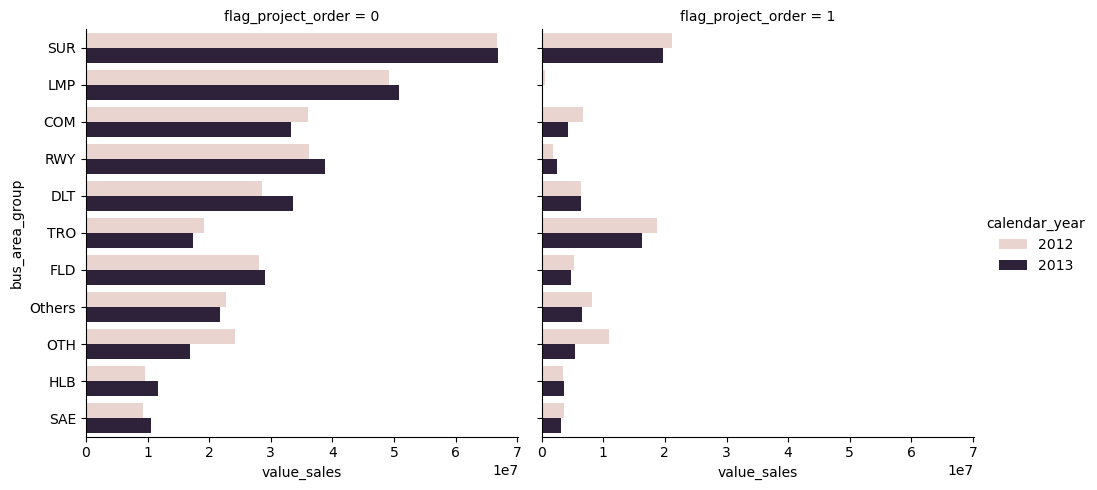

In [75]:
import seaborn as sns

# Calculate the order of `bus_area_group` based on the sum of `value_sales`
order = df_p2.groupby("bus_area_group")["value_sales"].sum().sort_values(ascending=False).index

# Create the catplot with bars sorted in descending order
sns.catplot(
    data=df_p2, 
    x="value_sales", 
    y="bus_area_group", 
    hue="calendar_year", 
    kind="bar", 
    estimator='sum', 
    errorbar=None, 
    col="flag_project_order",
    
    order=order  # Apply the sorted order here
)


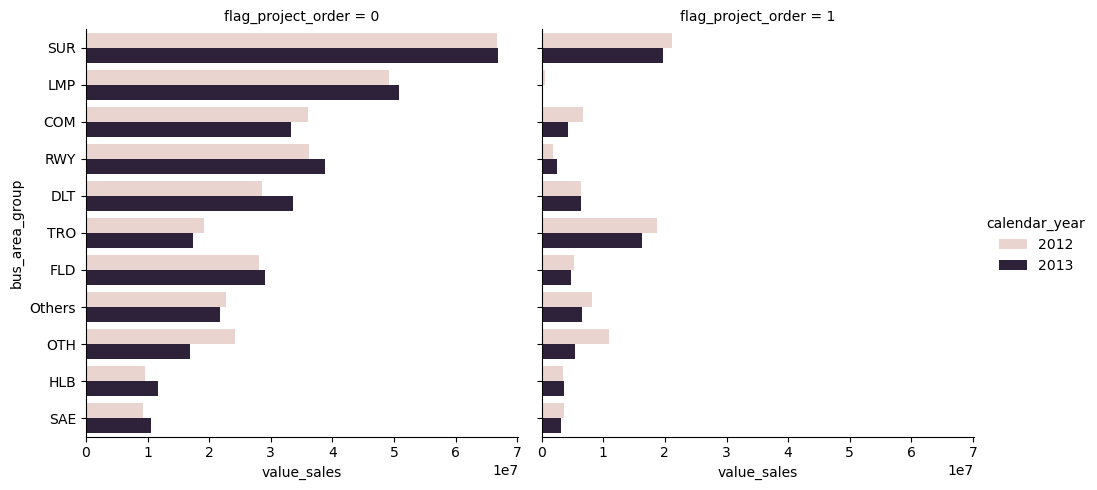

In [76]:
import seaborn as sns

# Calculate the order of `bus_area_group` based on the sum of `value_sales`
order = df_p2.groupby("bus_area_group")["value_sales"].sum().sort_values(ascending=False).index

# Create the catplot with bars sorted in descending order
sns.catplot(
    data=df_p2, 
    x="value_sales", 
    y="bus_area_group", 
    hue="calendar_year", 
    kind="bar", 
    estimator='sum', 
    errorbar=None, 
    col="flag_project_order",
    
    order=order  # Apply the sorted order here
)


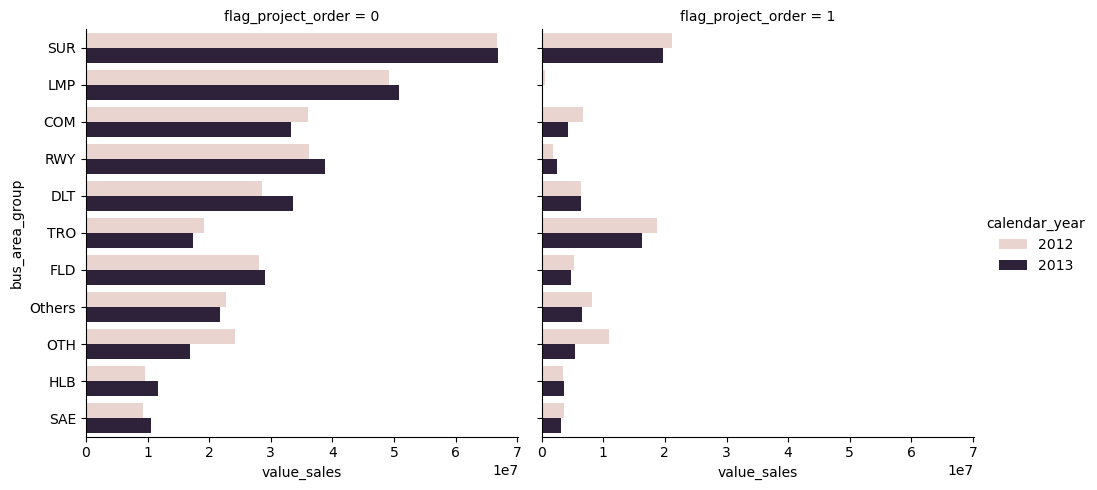

In [77]:
import seaborn as sns

# Calculate the order of `bus_area_group` based on the sum of `value_sales`
order = df_p2.groupby("bus_area_group")["value_sales"].sum().sort_values(ascending=False).index

# Create the catplot with bars sorted in descending order
sns.catplot(
    data=df_p2, 
    x="value_sales", 
    y="bus_area_group", 
    hue="calendar_year", 
    kind="bar", 
    estimator='sum', 
    errorbar=None, 
    col="flag_project_order",
    order=order  # Apply the sorted order here
)

In [78]:
df_p2.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,company_code,customer_code,customer_district_code,item_code,business_area_code,...,line_number,invoice_date,customer_order_number,order_date,unit_price,profit_margin,flag_project_order,export_order_flag,fx_order_flag,bus_area_group
0,2012-05-09,2012,11,2012,5,101,411800601,410,GENIE8WWWBC,LMP,...,1,2012-05-09,2865354,2012-05-09,2.60,0.225606,0,0,0,LMP
1,2012-02-16,2012,8,2012,2,101,361000403,300,GENIE8WWWBC,LMP,...,1,2012-02-16,2833515,2012-02-16,3.19,0.503724,0,0,0,LMP
2,2012-05-09,2012,11,2012,5,101,361000403,300,GENIE8WWWBC,LMP,...,1,2012-05-09,2864857,2012-05-08,3.35,0.579146,0,0,0,LMP
3,2012-05-18,2012,11,2012,5,101,565540415,500,GENIE8WWWBC,LMP,...,1,2012-05-18,2869759,2012-05-18,3.35,0.579146,0,0,0,LMP
4,2012-01-09,2012,7,2012,1,101,565540415,500,GENIE8WWWBC,LMP,...,1,2012-01-09,2819189,2012-01-09,3.19,0.503724,0,0,0,LMP


# Profit Margin

In [79]:
df_p2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979083 entries, 0 to 1988381
Data columns (total 44 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   fiscal_year               int64         
 2   fiscal_month              int64         
 3   calendar_year             int64         
 4   calendar_month            int64         
 5   company_code              int64         
 6   customer_code             object        
 7   customer_district_code    int64         
 8   item_code                 object        
 9   business_area_code        object        
 10  item_group_code           object        
 11  item_class_code           object        
 12  item_type                 object        
 13  bonus_group_code          object        
 14  environment_group_code    object        
 15  technology_group_code     object        
 16  commission_group_code     object        
 17  reporting_cla

In [80]:
# Step 1: Perform the aggregation to calculate value_sales, value_cost, profit, and profit_margin

df_agg = df_p2.groupby(
    ['invoice_number', 'calendar_year', 'calendar_month', 'customer_district_code', 
     'business_area_code', 'bonus_group_code', 'environment_group_code', 'technology_group_code', 
     'commission_group_code', 'abc_class_code', 'abc_class_volume', 'flag_project_order', 'order_type_code',
     'export_order_flag', 'currency'], as_index=False
).agg({
    'value_sales': 'sum',
    'value_cost': 'sum',
    
})

In [81]:
# recheck if aggregation is correct

df_p2_sales = df_p2['value_sales'].sum()
print (f'df_p2 sales =',df_p2_sales)

df_p2 sales = 820161347.2787639


In [82]:
df_p2_invoice = df_p2['invoice_number'].nunique()
df_p2_invoice

619272

In [83]:
data_invoice = data['invoice_number'].nunique()
data_invoice

619272

In [84]:
data['invoice_number'].count()

1979083

In [85]:
df_agg_sales = df_agg['value_sales'].sum()
print (f'df_agg_sales =', df_agg_sales)

df_agg_sales = 820161347.2787635


In [86]:
df_agg_invoice = df_agg['invoice_number'].nunique()
df_agg_invoice

619272

In [87]:
df_agg_inv_count = df_agg['invoice_number'].count()
df_agg_inv_count

1501227

In [88]:
df_agg_custdistrict = df_p2.groupby(
    [ 'calendar_year', 'customer_district_code', 
  ], as_index=False
).agg({
    'value_sales': 'sum',
    'value_cost': 'sum',
    
})

# Create a column profit margin
df_agg_custdistrict['%profit_margin'] = df_agg_custdistrict['value_sales']/df_agg_custdistrict['value_cost']-1
df_agg_custdistrict['profit'] = df_agg_custdistrict['value_sales']-df_agg_custdistrict['value_cost']
df_agg_custdistrict

,calendar_year,customer_district_code,value_sales,value_cost,%profit_margin,profit
0,2012,200,7.295506e+07,4.106377e+07,0.776628,3.189129e+07
1,2012,210,1.056841e+07,5.653891e+06,0.869228,4.914520e+06
2,2012,300,6.608869e+07,3.671199e+07,0.800193,2.937670e+07
3,2012,310,5.143454e+06,2.747574e+06,0.871998,2.395880e+06
4,2012,400,5.382589e+07,3.031964e+07,0.775281,2.350625e+07
5,2012,410,1.235232e+07,6.673687e+06,0.850899,5.678635e+06
6,2012,500,2.609542e+07,1.510882e+07,0.727165,1.098660e+07
7,2012,510,5.567812e+06,3.041025e+06,0.830900,2.526787e+06
8,2012,520,2.857915e+06,1.349429e+06,1.117870,1.508486e+06
9,2012,530,4.405891e+06,2.533484e+06,0.739064,1.872407e+06


In [89]:
# check with original data
data.groupby(['calendar_year','customer_district_code'])['value_cost'].sum()

calendar_year  customer_district_code
2012           200                       4.106377e+07
               210                       5.653891e+06
               300                       3.671199e+07
               310                       2.747574e+06
               400                       3.031964e+07
               410                       6.673687e+06
               500                       1.510882e+07
               510                       3.041025e+06
               520                       1.349429e+06
               530                       2.533484e+06
               535                       1.939073e+06
               540                       5.975995e+06
               545                       2.557618e+03
               600                       3.133058e+07
               710                       9.003643e+06
               720                       6.836489e+07
2013           200                       3.751250e+07
               210                       4.7

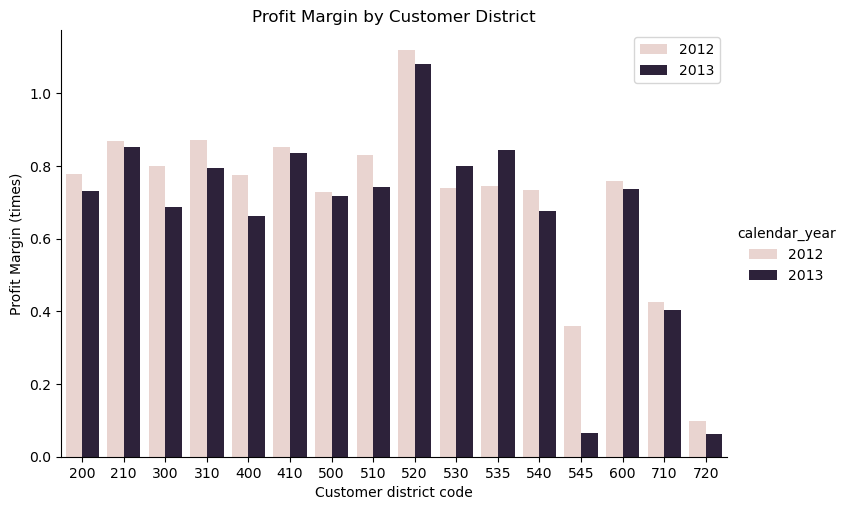

In [90]:
sns.catplot(data = df_agg_custdistrict, x='customer_district_code', y ='%profit_margin', kind = 'bar', hue='calendar_year', estimator = 'sum',
           height=5,aspect=1.5 )
plt.xlabel("Customer district code")
plt.ylabel("Profit Margin (times)")
plt.title("Profit Margin by Customer District")
#plt.xticks(rotation=0, fontsize=10)

plt.legend()
plt.show()

In [91]:
# add cust level
df_agg_custdistrict_bycust = df_p2.groupby(
    [ 'calendar_year', 'customer_district_code', 'customer_code'
  ], as_index=False
).agg({
    'value_sales': 'sum',
    'value_cost': 'sum',
    
})

# Create a column profit margin
df_agg_custdistrict_bycust['%profit_margin'] = df_agg_custdistrict_bycust['value_sales']/df_agg_custdistrict_bycust['value_cost']-1
df_agg_custdistrict_bycust['profit'] = df_agg_custdistrict_bycust['value_sales']-df_agg_custdistrict_bycust['value_cost']
df_agg_custdistrict_bycust

,calendar_year,customer_district_code,customer_code,value_sales,value_cost,%profit_margin,profit
0,2012,200,109900100,148351.330000,0.000000,inf,148351.330000
1,2012,200,146000100,40500.000000,22796.540000,0.776585,17703.460000
2,2012,200,147000100,610280.150000,491602.930000,0.241409,118677.220000
3,2012,200,147500100,1534.610000,762.896000,1.011559,771.714000
4,2012,200,148500100,859.900000,553.630000,0.553203,306.270000
...,...,...,...,...,...,...,...
7801,2013,720,Z81002401,64597.682002,105543.942224,-0.387955,-40946.260222
7802,2013,720,Z81002501,72915.829629,82979.789108,-0.121282,-10063.959479
7803,2013,720,Z90000301,0.000000,10936.506073,-1.000000,-10936.506073
7804,2013,720,Z90000601,58870.500720,31293.258765,0.881252,27577.241955


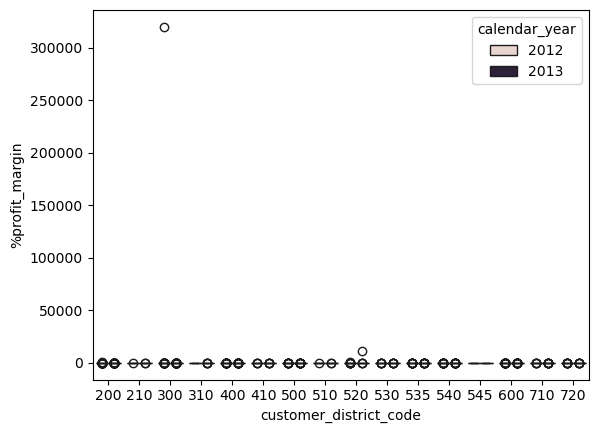

In [92]:
sns.boxplot(data=df_agg_custdistrict_bycust, x='customer_district_code', y='%profit_margin', hue="calendar_year")
plt.show()

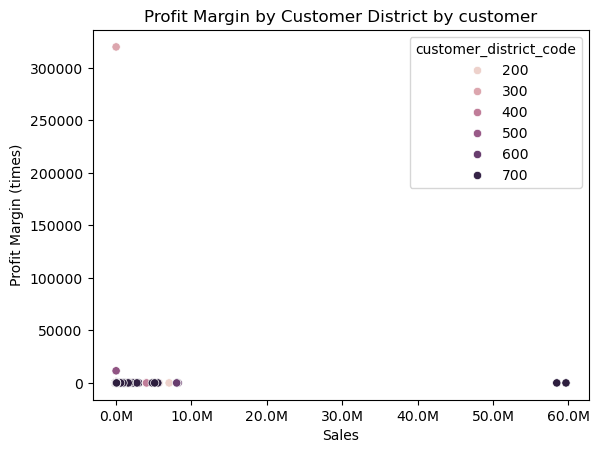

In [93]:
from matplotlib.ticker import FuncFormatter
sns.scatterplot(data=df_agg_custdistrict_bycust, x='value_sales', y='%profit_margin', hue="customer_district_code")
plt.xlabel("Sales")
plt.ylabel("Profit Margin (times)")
plt.title("Profit Margin by Customer District by customer")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))

plt.show()

In [94]:
df_agg_custdistrict_bycust_1 = df_agg_custdistrict_bycust[df_agg_custdistrict_bycust['%profit_margin'] > -0.5]

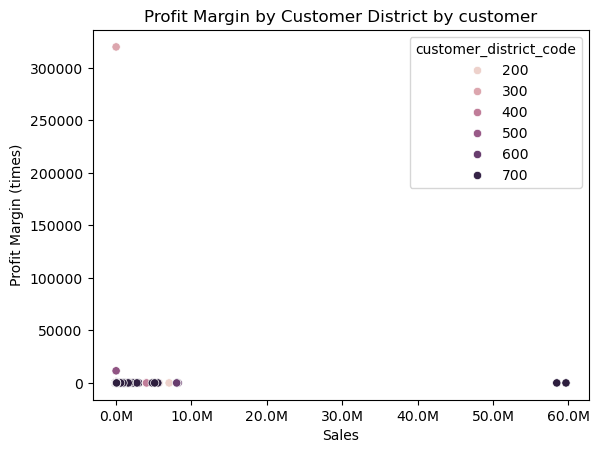

In [95]:
sns.scatterplot(data=df_agg_custdistrict_bycust_1, x='value_sales', y='%profit_margin', hue="customer_district_code")
plt.xlabel("Sales")
plt.ylabel("Profit Margin (times)")
plt.title("Profit Margin by Customer District by customer")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))

plt.show()

# Profit Margin By Currency

In [96]:
# Profit Margin by FX

df_agg_fx = df_p2.groupby(
    [ 'calendar_year', 'currency', 'customer_code'
  ], as_index=False
).agg({
    'value_sales': 'sum',
    'value_cost': 'sum',
    
})

# Create a column profit margin
df_agg_fx ['%profit_margin'] = df_agg_fx['value_sales']/df_agg_fx['value_cost']-1
df_agg_fx ['profit'] = df_agg_fx['value_sales']-df_agg_fx['value_cost']
df_agg_fx 

,calendar_year,currency,customer_code,value_sales,value_cost,%profit_margin,profit
0,2012,AUD,100210100,66374.080000,52294.880000,0.269227,14079.200000
1,2012,AUD,100230100,36742.000000,25852.727200,0.421204,10889.272800
2,2012,AUD,100250200,656.400000,558.600000,0.175081,97.800000
3,2012,AUD,100270100,1234.710000,489.576600,1.521996,745.133400
4,2012,AUD,100296100,180.000000,91.740000,0.962067,88.260000
...,...,...,...,...,...,...,...
7802,2013,USD,829920100,3754.134517,3326.527939,0.128544,427.606578
7803,2013,USD,848330801,30110.821879,27166.671551,0.108374,2944.150328
7804,2013,USD,851910100,379274.202405,358517.658594,0.057895,20756.543812
7805,2013,USD,857709100,15992.982890,7541.747486,1.120594,8451.235404


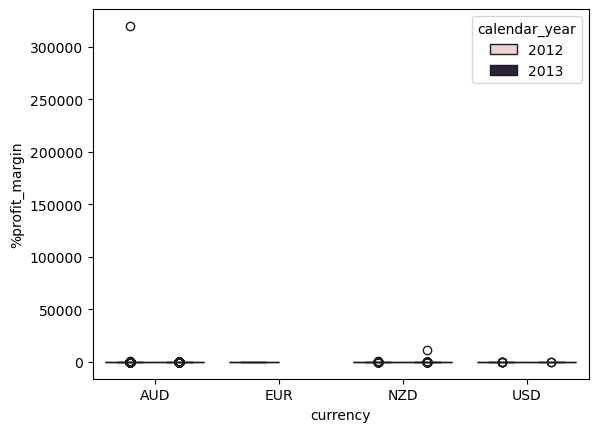

In [97]:
sns.boxplot(data=df_agg_fx, x='currency', y='%profit_margin', hue="calendar_year")
plt.show()

In [98]:
df_agg_fx.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7807 entries, 0 to 7806
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   calendar_year   7807 non-null   int64  
 1   currency        7807 non-null   object 
 2   customer_code   7807 non-null   object 
 3   value_sales     7807 non-null   float64
 4   value_cost      7807 non-null   float64
 5   %profit_margin  7799 non-null   float64
 6   profit          7807 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 427.1+ KB


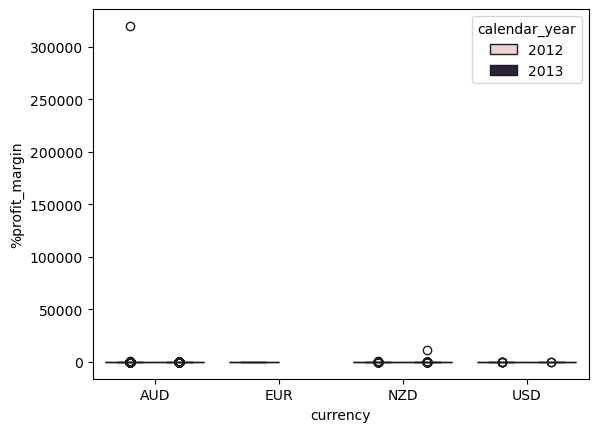

In [99]:


sns.boxplot(data=df_agg_fx, x='currency', y='%profit_margin', hue="calendar_year")
plt.show()


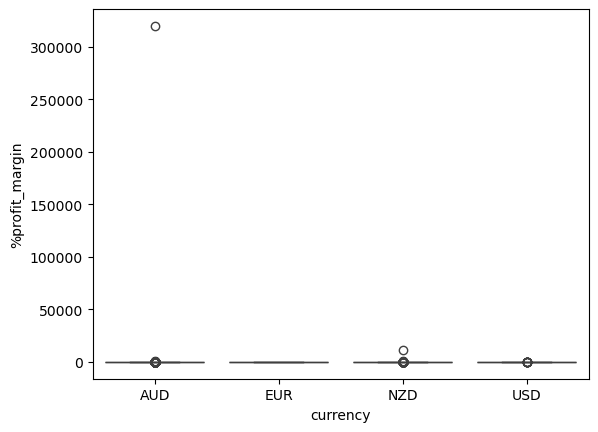

In [100]:
sns.boxplot(data=df_agg_fx, x='currency', y='%profit_margin')
plt.show()

In [101]:
# Profit Margin by FX

df_agg_fx_summary = df_p2.groupby(
    [ 'calendar_year', 'currency', 
  ], as_index=False
).agg({
    'value_sales': 'sum',
    'value_cost': 'sum',
    
})

# Create a column profit margin
df_agg_fx_summary ['%profit_margin'] = df_agg_fx_summary ['value_sales']/df_agg_fx_summary ['value_cost']-1
df_agg_fx_summary ['profit'] = df_agg_fx_summary ['value_sales']-df_agg_fx_summary ['value_cost']
df_agg_fx_summary 

,calendar_year,currency,value_sales,value_cost,%profit_margin,profit
0,2012,AUD,3.916670e+08,2.463429e+08,0.589926,1.453241e+08
1,2012,EUR,6.746844e+04,6.662618e+04,0.012642,8.422667e+02
2,2012,NZD,2.113760e+07,1.189599e+07,0.776868,9.241610e+06
3,2012,USD,3.754996e+06,3.514531e+06,0.068420,2.404653e+05
4,2013,AUD,3.782605e+08,2.500468e+08,0.512759,1.282137e+08
5,2013,NZD,2.117854e+07,1.214677e+07,0.743553,9.031772e+06
6,2013,USD,4.095253e+06,3.587961e+06,0.141387,5.072919e+05


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

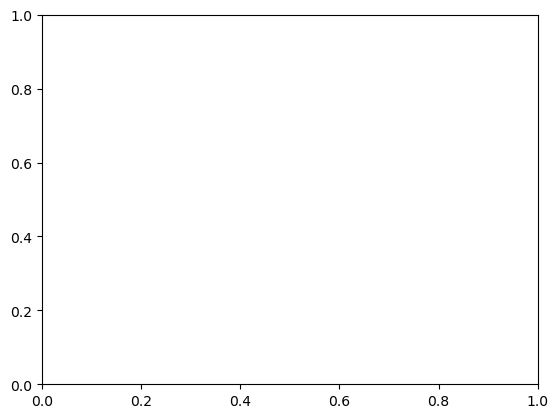

In [102]:
plt.xticks(rotation=0, fontsize=10)

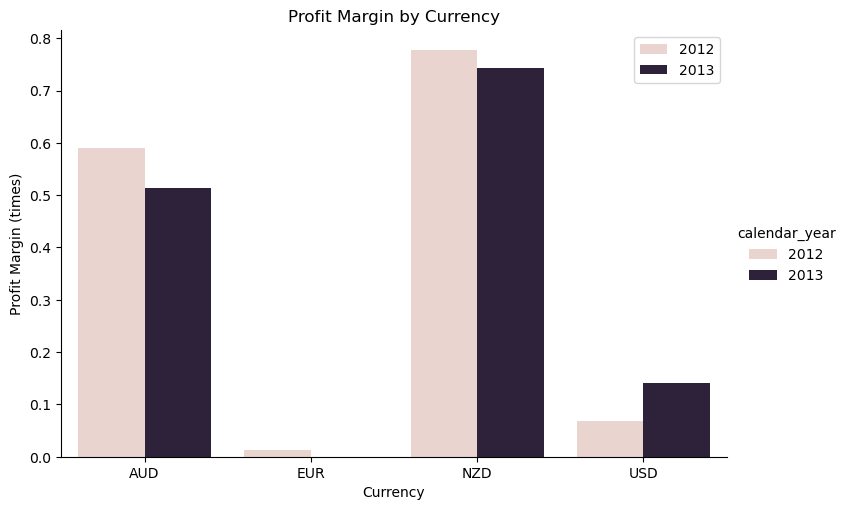

In [103]:
sns.catplot(data = df_agg_fx_summary , x='currency', y ='%profit_margin', kind = 'bar', hue='calendar_year', estimator = 'sum',
           height=5,aspect=1.5 )
plt.xlabel("Currency")
plt.ylabel("Profit Margin (times)")
plt.title("Profit Margin by Currency")
#plt.xticks(rotation=0, fontsize=10)

plt.legend()
plt.show()

# CHURN

In [104]:
import numpy as np
import pandas as pd

# Sample DataFrame setup for demonstration
# df_p2 = pd.DataFrame(...)  # Assuming df_p2 is already defined

# Step 1: Get the latest order date per customer
churn = df_p2.groupby('customer_code').agg({'order_date': 'max'}).rename(columns={'order_date': 'latest_order_date'})

# Step 2: Merge the latest order date back to the original DataFrame
df_p2 = df_p2.merge(churn, on='customer_code', how='left')

# Step 3: Define the cutoff date for churn
cutoff_date = pd.to_datetime("2013-06-30")

# Step 4: Apply the churn flag condition
df_p2['churn_flag'] = np.where(df_p2['latest_order_date'] <= cutoff_date, 1, 0)

# Drop the 'latest_order_date' column if it's no longer needed
df_p2.drop(columns=['latest_order_date'], inplace=True)

print(df_p2.head())

  accounting_date  fiscal_year  fiscal_month  calendar_year  calendar_month  \
0      2012-05-09         2012            11           2012               5   
1      2012-02-16         2012             8           2012               2   
2      2012-05-09         2012            11           2012               5   
3      2012-05-18         2012            11           2012               5   
4      2012-01-09         2012             7           2012               1   

   company_code customer_code  customer_district_code    item_code  \
0           101     411800601                     410  GENIE8WWWBC   
1           101     361000403                     300  GENIE8WWWBC   
2           101     361000403                     300  GENIE8WWWBC   
3           101     565540415                     500  GENIE8WWWBC   
4           101     565540415                     500  GENIE8WWWBC   

  business_area_code  ... invoice_date customer_order_number order_date  \
0                LMP  ...   2

In [105]:
df_churn = df_p2[df_p2['churn_flag']==1] 
print(df_churn['customer_code'].count())

36938


In [106]:
# Define the specific order_type_codes that represent returns
return_codes = ['CDG', 'CRR', 'WDC', 'CPR', 'ZCG']

# Step 1: Create a new 'return' column in df_churn
df_churn['return'] = df_churn.apply(lambda row: row['value_sales'] if row['order_type_code'] in return_codes else 0, axis=1)

# Step 2: Aggregate data to calculate total value_sales, total_return, and %return_to_sales
aggregated_df = df_churn.groupby(['customer_code', 'calendar_year']).agg(
    value_sales=('value_sales', 'sum'),         # Total sales per customer per year
    total_return=('return', lambda x: abs(x.sum()))  # Sum of returns per customer per year, taking absolute value
).reset_index()

# Step 3: Calculate %return_to_sales without *-1
aggregated_df['%return_to_sales'] = (aggregated_df['total_return'] / (aggregated_df['value_sales']+aggregated_df['total_return']))

# Select only the required columns for the output
churn_return_df = aggregated_df[['customer_code', 'calendar_year', 'value_sales','total_return', '%return_to_sales']]

# Display the result
print(churn_return_df)

     customer_code  calendar_year    value_sales  total_return  \
0        100230100           2012   36742.000000          0.00   
1        100230100           2013     448.920000          0.00   
2        100296100           2012     180.000000          0.00   
3        101296100           2012  276669.100000      12828.39   
4        101891100           2012  568526.000000       3336.00   
...            ...            ...            ...           ...   
1275     ZI8007501           2012    9261.150772          0.00   
1276     ZI8008001           2013     832.063044          0.00   
1277     ZI9000103           2013     987.288230          0.00   
1278     ZI9500101           2012     325.888081          0.00   
1279     ZI9500102           2012     143.708360          0.00   

      %return_to_sales  
0             0.000000  
1             0.000000  
2             0.000000  
3             0.044313  
4             0.005834  
...                ...  
1275          0.000000  
1276   

In [107]:
# drop negative value sales because they are inactive for over 2 years and not our focus

churn_return_df = churn_return_df[(churn_return_df['value_sales'] >0) & (churn_return_df['total_return'] >0)]

In [108]:
churn_return_df.describe()

,calendar_year,value_sales,total_return,%return_to_sales
count,201.000000,201.000000,201.000000,201.000000
mean,2012.159204,35523.807057,4816.116329,0.132530
std,0.366780,72363.528795,26143.595673,0.168275
min,2012.000000,61.520000,5.000000,0.000867
25%,2012.000000,2059.930000,195.700000,0.019414
50%,2012.000000,12672.970614,691.009577,0.065123
75%,2012.000000,33728.320000,1845.273352,0.172605
max,2013.000000,568526.000000,269559.566693,0.825952


<Axes: xlabel='%return_to_sales', ylabel='Count'>

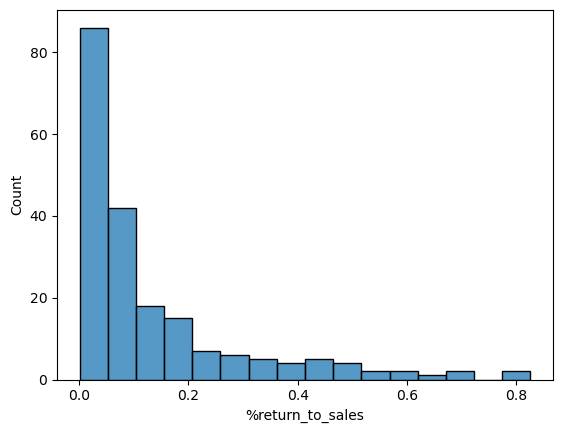

In [109]:
sns.histplot(data = churn_return_df, x= '%return_to_sales')

In [110]:
df_not_churn = df_p2[df_p2['churn_flag']==0] 
print(df_not_churn['customer_code'].count())

1942145


In [111]:
# Step 1: Create a new 'return' column in df_churn
df_not_churn['return'] = df_not_churn.apply(lambda row: row['value_sales'] if row['order_type_code'] in return_codes else 0, axis=1)

# Step 2: Aggregate data to calculate total value_sales, total_return, and %return_to_sales
aggregated_df_not_churn = df_not_churn.groupby(['customer_code', 'calendar_year']).agg(
    value_sales=('value_sales', 'sum'),         # Total sales per customer per year
    total_return=('return', lambda x: abs(x.sum()))  # Sum of returns per customer per year, taking absolute value
).reset_index()

# Step 3: Calculate %return_to_sales without *-1
aggregated_df_not_churn['%return_to_sales'] = (aggregated_df_not_churn['total_return'] / (aggregated_df_not_churn['value_sales']+aggregated_df_not_churn['total_return']))

# Select only the required columns for the output
not_churn_return_df = aggregated_df_not_churn[['customer_code', 'calendar_year', 'value_sales','total_return', '%return_to_sales']]

# Display the result
print(not_churn_return_df)

     customer_code  calendar_year   value_sales  total_return  \
0        100050100           2013  4.800610e+06  22540.900000   
1        100210100           2012  6.637408e+04      0.000000   
2        100210100           2013  7.041620e+03      0.000000   
3        100250200           2012  6.564000e+02   1102.200000   
4        100250200           2013  1.151485e+04      0.000000   
...            ...            ...           ...           ...   
6521     ZI8009401           2013  4.436424e+03      0.000000   
6522     ZI9000101           2012  1.829266e+05   1580.521550   
6523     ZI9000101           2013  2.802483e+05    598.444776   
6524     ZI9000102           2012  7.024114e+05   5167.552021   
6525     ZI9000102           2013  1.024904e+06  41380.337886   

      %return_to_sales  
0             0.004673  
1             0.000000  
2             0.000000  
3             0.626749  
4             0.000000  
...                ...  
6521          0.000000  
6522          0.008

In [112]:
# drop negative value sales because they are inactive for over 2 years and not our focus

not_churn_return_df = not_churn_return_df[not_churn_return_df['value_sales'] >0  & (not_churn_return_df['total_return'] >0)]

<Axes: xlabel='%return_to_sales', ylabel='Count'>

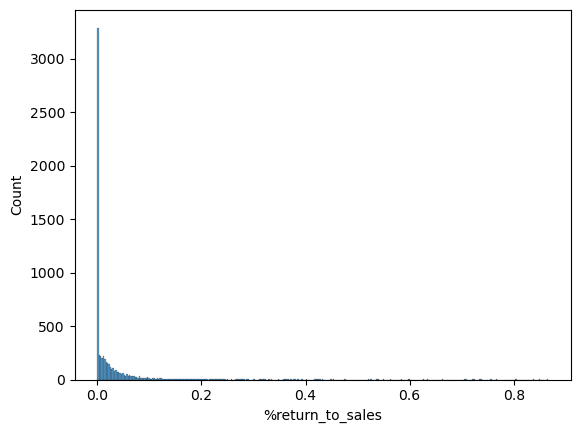

In [113]:
sns.histplot(data = not_churn_return_df, x= '%return_to_sales')

In [114]:
churn_return = churn_return_df['%return_to_sales']
not_churn_return = not_churn_return_df['%return_to_sales']

In [115]:
print(churn_return_df['%return_to_sales'].mean())
print(not_churn_return_df['%return_to_sales'].mean())

0.13252986245829818
0.02458471311907598


In [116]:
from scipy.stats import shapiro

# Assuming `data_column` is the column you want to test for normality
statistic, p_value = shapiro(churn_return)

# Display the results
print("Shapiro-Wilk Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
if p_value > 0.05:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.7402158378113164
P-value: 1.773305933948647e-17
The data does not appear to be normally distributed (reject H0).


In [117]:
from scipy.stats import shapiro

# Assuming `data_column` is the column you want to test for normality
statistic, p_value = shapiro(not_churn_return)

# Display the results
print("Shapiro-Wilk Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
if p_value > 0.05:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")


Shapiro-Wilk Test Statistic: 0.4074812943867463
P-value: 1.8842302829781806e-90
The data does not appear to be normally distributed (reject H0).


In [118]:
# Perform the two-sample t-test
# Perform a two-sample t-test # 2 Independent Samples
t_statistic, p_value = stats.ttest_ind(churn_return, not_churn_return ,equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 9.075595419248298
p-value: 1.0358585824886103e-16


# Different Price

In [119]:
sur = df_p2[df_p2["business_area_code"] == "SUR"]

In [120]:
sum_sur = sur.groupby('item_code')['value_sales'].count()
sum_sur = sum_sur.sort_values(ascending=False) 
print(sum_sur)

item_code
nan            65587
PND236EL        6755
16370           4813
26015           3257
26561           3170
               ...  
GOC2497BI          1
U2P214E4WLM        1
GOC2616VE          1
MNX150H            1
DMPB1-1            1
Name: value_sales, Length: 5112, dtype: int64


In [121]:
sum_sur = sur.groupby('item_code')['value_sales'].sum()
sum_sur = sum_sur.sort_values(ascending=False) 
print(sum_sur)

item_code
nan              6.291175e+06
PND236EL         6.268734e+06
BWP/T236H        3.227419e+06
METROMINEP70H    3.217048e+06
DBD236EL         2.826099e+06
                     ...     
DBD218ELNL      -6.763200e+03
PND136SP13      -8.312640e+03
HI5128DE8       -8.806310e+03
5LS41271L       -1.300000e+04
IS454NS         -2.464800e+04
Name: value_sales, Length: 5112, dtype: float64


In [122]:
sum_sur = sur.groupby('item_code')['value_sales'].count()
sum_sur = sum_sur.sort_values(ascending=False) 
print(sum_sur)

item_code
nan            65587
PND236EL        6755
16370           4813
26015           3257
26561           3170
               ...  
GOC2497BI          1
U2P214E4WLM        1
GOC2616VE          1
MNX150H            1
DMPB1-1            1
Name: value_sales, Length: 5112, dtype: int64


In [123]:
item_1 = df_p2[df_p2['item_code']== "PND236EL"]

In [124]:
# Create Aggregate level by Customer code

# Group by the required columns and calculate the sum for value_sales and value_cost
item_1_agg = item_1.groupby(['calendar_year', 'customer_district_code', 'customer_code']).agg({
    'value_sales': 'sum',
    'value_cost': 'sum',
    'value_quantity':'sum'
}).reset_index()

# Calculate profit_margin
item_1_agg['profit_margin'] = (item_1_agg['value_sales'] - item_1_agg['value_cost']) / item_1_agg['value_cost']

# Display the result
print(item_1_agg)


      calendar_year  customer_district_code customer_code  value_sales  \
0              2012                     200     200000000       105.78   
1              2012                     200     200948701      6637.33   
2              2012                     200     200958601      2542.85   
3              2012                     200     209150100       169.27   
4              2012                     200     209827701      2559.98   
...             ...                     ...           ...          ...   
1103           2013                     710     100050100     60884.00   
1104           2013                     710     200000001       357.29   
1105           2013                     720     234750001   1137422.15   
1106           2013                     720     600250100       151.65   
1107           2013                     720     850900100       124.20   

        value_cost  value_quantity  profit_margin  
0     8.763000e+01             3.0       0.207121  
1     4

In [125]:
item_1_agg.groupby('customer_district_code')['profit_margin'].describe()

,count,mean,std,min,25%,50%,75%,max
customer_district_code,,,,,,,,
200,202.0,0.402810,0.153976,-0.114407,0.354468,0.413518,0.448742,0.909525
210,60.0,0.556224,0.958228,0.196508,0.385009,0.431524,0.448776,7.798339
300,281.0,0.367709,0.172730,-1.565734,0.302646,0.365257,0.440549,0.909562
310,21.0,0.441900,0.106171,0.260055,0.405336,0.434520,0.448819,0.679948
400,208.0,-inf,NaN,-inf,0.304417,0.365998,0.441229,1.759318
410,49.0,0.454932,0.297081,0.126355,0.324373,0.417204,0.448819,2.046751
500,117.0,0.386176,0.101378,0.177064,0.321983,0.388235,0.440172,0.738831
510,11.0,0.427477,0.153778,0.188954,0.315389,0.438111,0.448819,0.714286
520,1.0,1.540545,NaN,1.540545,1.540545,1.540545,1.540545,1.540545


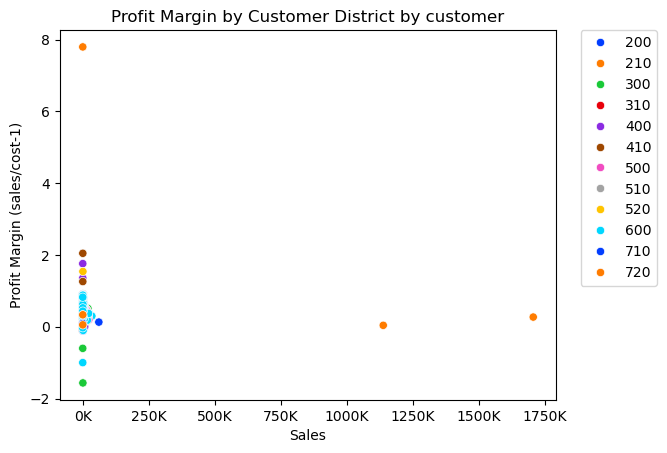

In [126]:
sns.scatterplot(data=item_1_agg, x='value_sales', y='profit_margin', hue="customer_district_code", palette = "bright")
plt.xlabel("Sales")
plt.ylabel("Profit Margin (sales/cost-1)")
plt.title("Profit Margin by Customer District by customer")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e3:.0f}K'))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

<Axes: xlabel='customer_district_code', ylabel='profit_margin'>

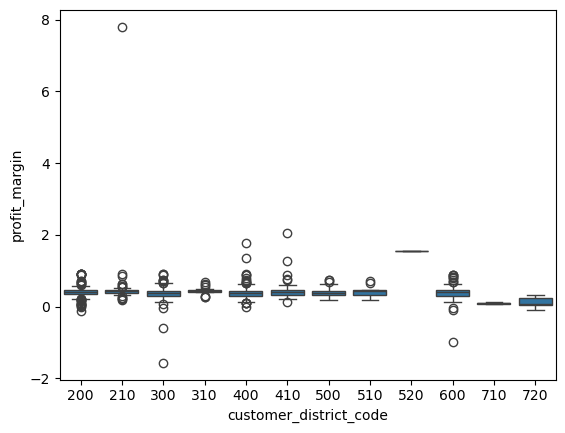

In [127]:
sns.boxplot(data = item_1_agg, y='profit_margin', x='customer_district_code')

In [128]:
item_1 = item_1[(item_1['unit_price'] > 0) & (item_1['value_sales'] >0)]

In [129]:
refund_codes = ['CRR', 'CRD', 'COP', 'CPR', 'CRP', 'ZCG', 'ZCR', 'WDC', 'CDG']
item_1 = item_1[~item_1['order_type_code'].isin(refund_codes)]

In [130]:
item_1.groupby(['customer_district_code','flag_project_order'])['unit_price'].describe()

count        mean       std  \
customer_district_code flag_project_order                                 
200                    0                    789.0   40.700840  2.917663   
                       1                     11.0   43.416580  8.530383   
210                    0                    256.0   40.966245  2.198988   
                       1                      7.0   42.306825  0.033887   
300                    0                   1180.0   39.793555  2.581639   
                       1                     14.0   40.460157  2.190263   
310                    0                     78.0   41.631421  1.287657   
                       1                      1.0   40.180000       NaN   
400                    0                    903.0   38.783138  3.214148   
                       1                     21.0   39.477619  2.199034   
410                    0                    194.0   39.364708  3.029779   
                       1                      5.0   40.128000  3.129085   
500                    0                   1043.0   39.924331  2.858442   
                       1                      9.0   41.206667  2.564937   
510                    0                     59.0   40.120026  2.540021   
                       1                      1.0   42.317500       NaN   
520                    0                      1.0  142.884851       NaN   
600                    0                    576.0   39.536026  3.416277   
                       1                     15.0   39.501867  2.624221   
710                    0                     13.0   30.762308  3.068656   
720                    0                    229.0   29.708428  5.163608   
                       1                      1.0   32.470000       NaN   

                                                  min         25%         50%  \
customer_district_code flag_project_order                                       
200                    0                    26.020000   40.788000   42.317500   
                       1                    36.000000   40.941190   42.320000   
210                    0                    32.000000   40.787292   42.317500   
                       1                    42.230000   42.318889   42.320000   
300                    0                    28.660000   37.800000   40.788000   
                       1                    36.000000   39.237500   40.721100   
310                    0                    37.000000   41.050667   42.318000   
                       1                    40.180000   40.180000   40.180000   
400                    0                    25.000000   36.000000   38.990000   
                       1                    36.260000   38.500000   39.400000   
410                    0                    27.000000   36.000000   40.560000   
                       1                    36.000000   37.850000   40.790000   
500                    0                    24.475000   37.050000   41.050000   
                       1                    36.000000   40.200000   42.320000   
510                    0                    34.900000   37.900000   40.790000   
                       1                    42.317500   42.317500   42.317500   
520                    0                   142.884851  142.884851  142.884851   
600                    0                    26.500000   37.050000   40.790000   
                       1                    34.500000   37.845000   40.788000   
710                    0                    24.770000   29.210000   32.450000   
720                    0                    22.520000   26.540000   26.540000   
                       1                    32.470000   32.470000   32.470000   

                                                  75%         max  
customer_district_code flag_project_order                          
200                    0                    42.318333   43.003333  
                       1                    42.320000   68.100000  
210                    0  

In [131]:
item_project = item_1.copy()

<Axes: xlabel='customer_district_code', ylabel='unit_price'>

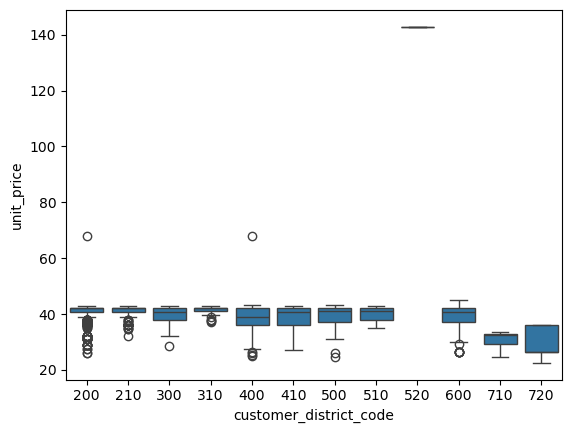

In [132]:
sns.boxplot(data = item_1, y='unit_price', x='customer_district_code')

<Axes: xlabel='order_type_code', ylabel='unit_price'>

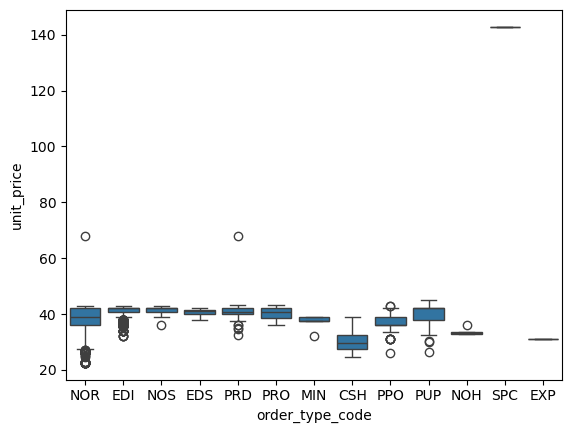

In [133]:
sns.boxplot(data = item_1, y='unit_price', x='order_type_code')

In [134]:
item_1.query('unit_price >1000').transpose()

""
accounting_date
fiscal_year
fiscal_month
calendar_year
calendar_month
company_code
customer_code
customer_district_code
item_code
business_area_code


In [135]:
item_1.groupby(['customer_district_code','flag_project_order'])['value_sales'].count()

customer_district_code  flag_project_order
200                     0                      789
                        1                       11
210                     0                      256
                        1                        7
300                     0                     1180
                        1                       14
310                     0                       78
                        1                        1
400                     0                      903
                        1                       21
410                     0                      194
                        1                        5
500                     0                     1043
                        1                        9
510                     0                       59
                        1                        1
520                     0                        1
600                     0                      576
                        1              

In [136]:
item_1 = item_1[item_1['flag_project_order'] == 0]

In [137]:
price_c_200 = item_1[item_1['customer_district_code'] == 200]['unit_price']
price_c_200.shape

(789,)

In [138]:
price_c_300 = item_1[item_1['customer_district_code'] == 300]['unit_price']
price_c_300.shape

(1180,)

In [139]:
from scipy.stats import shapiro

# Assuming `data_column` is the column you want to test for normality
statistic, p_value = shapiro(price_c_200)

# Display the results
print("Shapiro-Wilk Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
if p_value > 0.05:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")


Shapiro-Wilk Test Statistic: 0.6686636131783587
P-value: 1.5206599615784504e-36
The data does not appear to be normally distributed (reject H0).


In [140]:
from scipy.stats import shapiro

# Assuming `data_column` is the column you want to test for normality
statistic, p_value = shapiro(price_c_300)

# Display the results
print("Shapiro-Wilk Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
if p_value > 0.05:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.845371087785624
P-value: 2.092488557138349e-32
The data does not appear to be normally distributed (reject H0).


In [141]:
# Perform Levene's test
stat, p_value = stats.levene(price_c_200, price_c_300)

# Print the results
print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Variances are significantly different (reject null hypothesis of equal variances).")
else:
    print("Variances are not significantly different (fail to reject null hypothesis of equal variances).")

Levene's test statistic: 35.90906754718867
p-value: 2.452660986467307e-09
Variances are significantly different (reject null hypothesis of equal variances).


In [142]:
# Perform the two-sample t-test
# Perform a two-sample t-test # 2 Independent Samples
t_statistic, p_value = stats.ttest_ind(price_c_200, price_c_300 ,equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 7.076616977520203
p-value: 2.2321220448654888e-12


In [143]:
item_2 = df_p2[df_p2['item_code']== "PND236EL"]

In [144]:
item_2 = item_2[(item_2['unit_price'] > 0) & (item_2['value_sales'] >0)]

In [145]:
item_2 = item_2[~item_2['order_type_code'].isin(refund_codes)]

In [146]:
project_t = item_2[item_2['flag_project_order'] == 1]['unit_price']

In [147]:
non_project =  item_2[item_2['flag_project_order'] == 0]['unit_price']

In [148]:
project_t 

86821      40.790000
87094      39.565714
87974      42.320000
88687      40.790000
89131      38.500000
             ...    
1715997    39.000000
1716238    39.000000
1716566    34.500000
1717226    42.320000
1717855    43.000000
Name: unit_price, Length: 85, dtype: float64

In [149]:
# Perform the two-sample t-test
# Perform a two-sample t-test # 2 Independent Samples
t_statistic, p_value = stats.ttest_ind(project_t, non_project ,equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 2.7372443529611012
p-value: 0.007514755339001904


<Axes: xlabel='flag_project_order', ylabel='unit_price'>

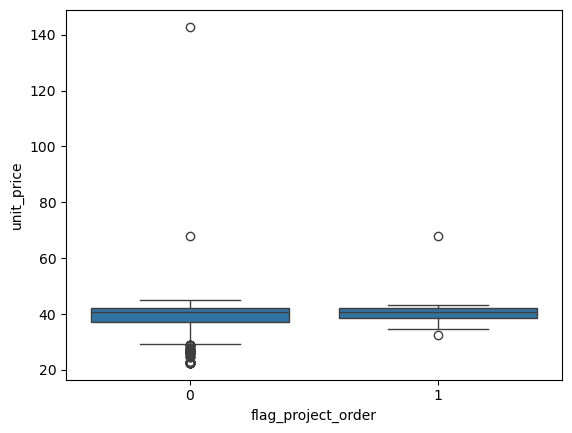

In [150]:
sns.boxplot(data = item_2, y='unit_price', x='flag_project_order')